In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/drive/MyDrive/cleaned_datasets/cleaned_industries.csv'
data = pd.read_csv(file_path)


key_sectors = [
    'B24050_001E',  # Total Employment
    'Construction',
    'Manufacturing',
    'Retail trade',
    'Information',
    'Finance and insurance, and real estate, and rental and leasing:',
    'Professional, scientific, and management, and administrative, and waste management services:',
    'Educational services, and health care and social assistance:',
    'Arts, entertainment, and recreation, and accommodation and food services:',
    'Public administration'
]

# Focusing on these sectors
sector_data = data[key_sectors]









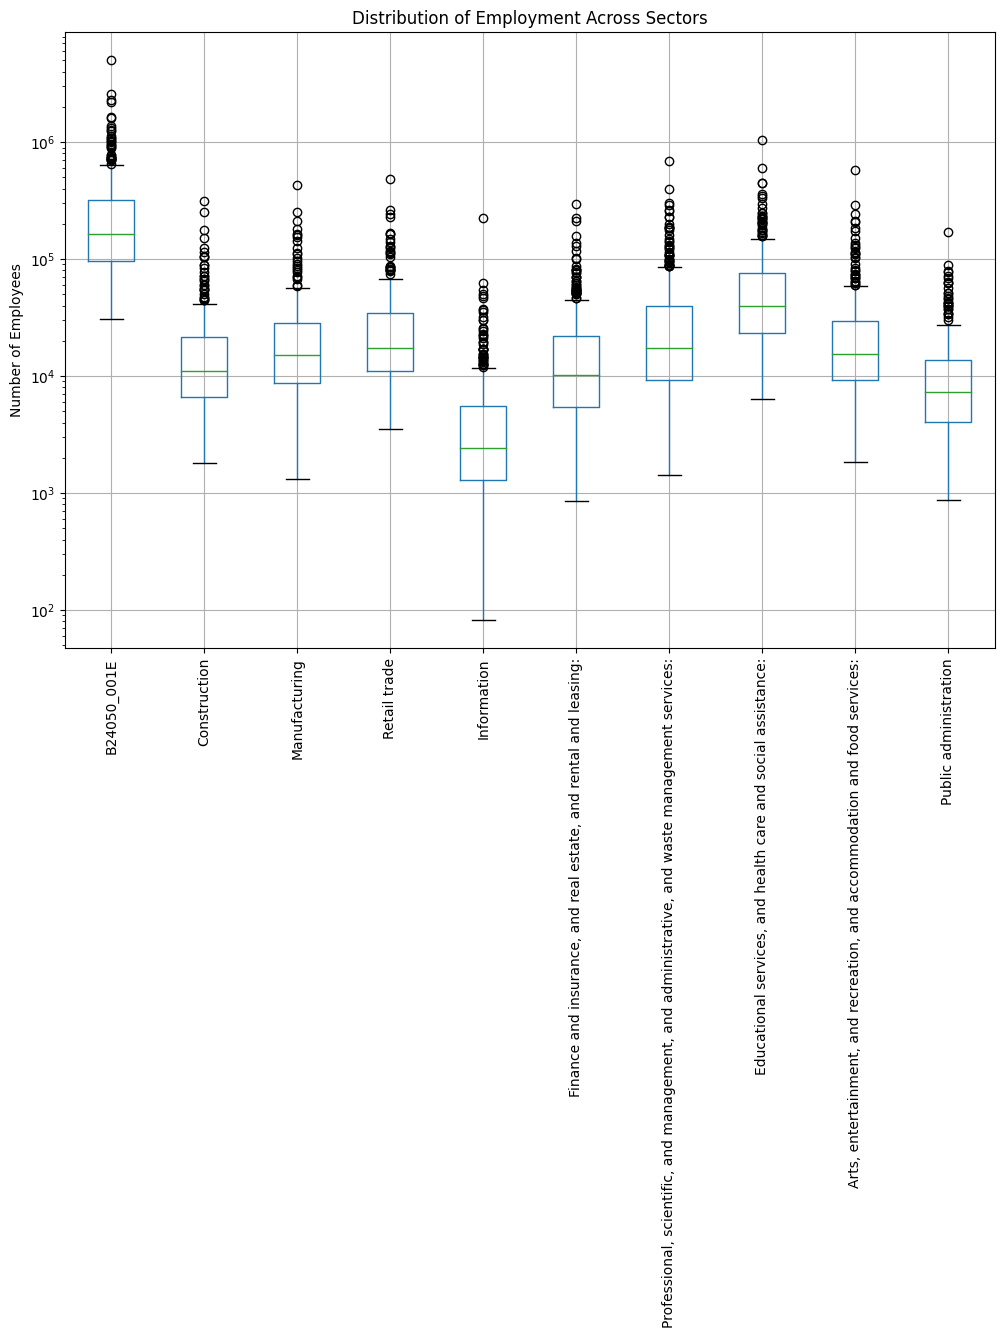

In [ ]:
# Industry and Occupational Distribution
# Plotting the distribution of employment across sectors
plt.figure(figsize=(12, 8))
sector_data.boxplot()
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Distribution of Employment Across Sectors')
plt.ylabel('Number of Employees')
plt.show()

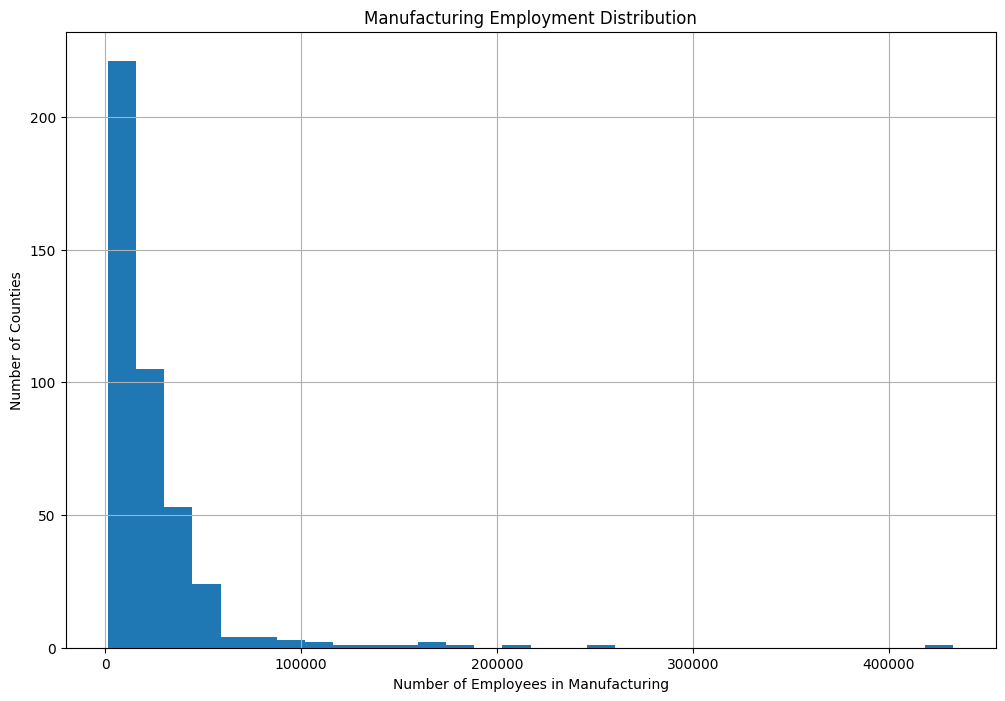

In [ ]:
# Sector-Specific Trends
# Analyzing the 'Manufacturing' sector
manufacturing_data = sector_data['Manufacturing']
plt.figure(figsize=(12, 8))
manufacturing_data.hist(bins=30)
plt.title('Manufacturing Employment Distribution')
plt.xlabel('Number of Employees in Manufacturing')
plt.ylabel('Number of Counties')
plt.show()


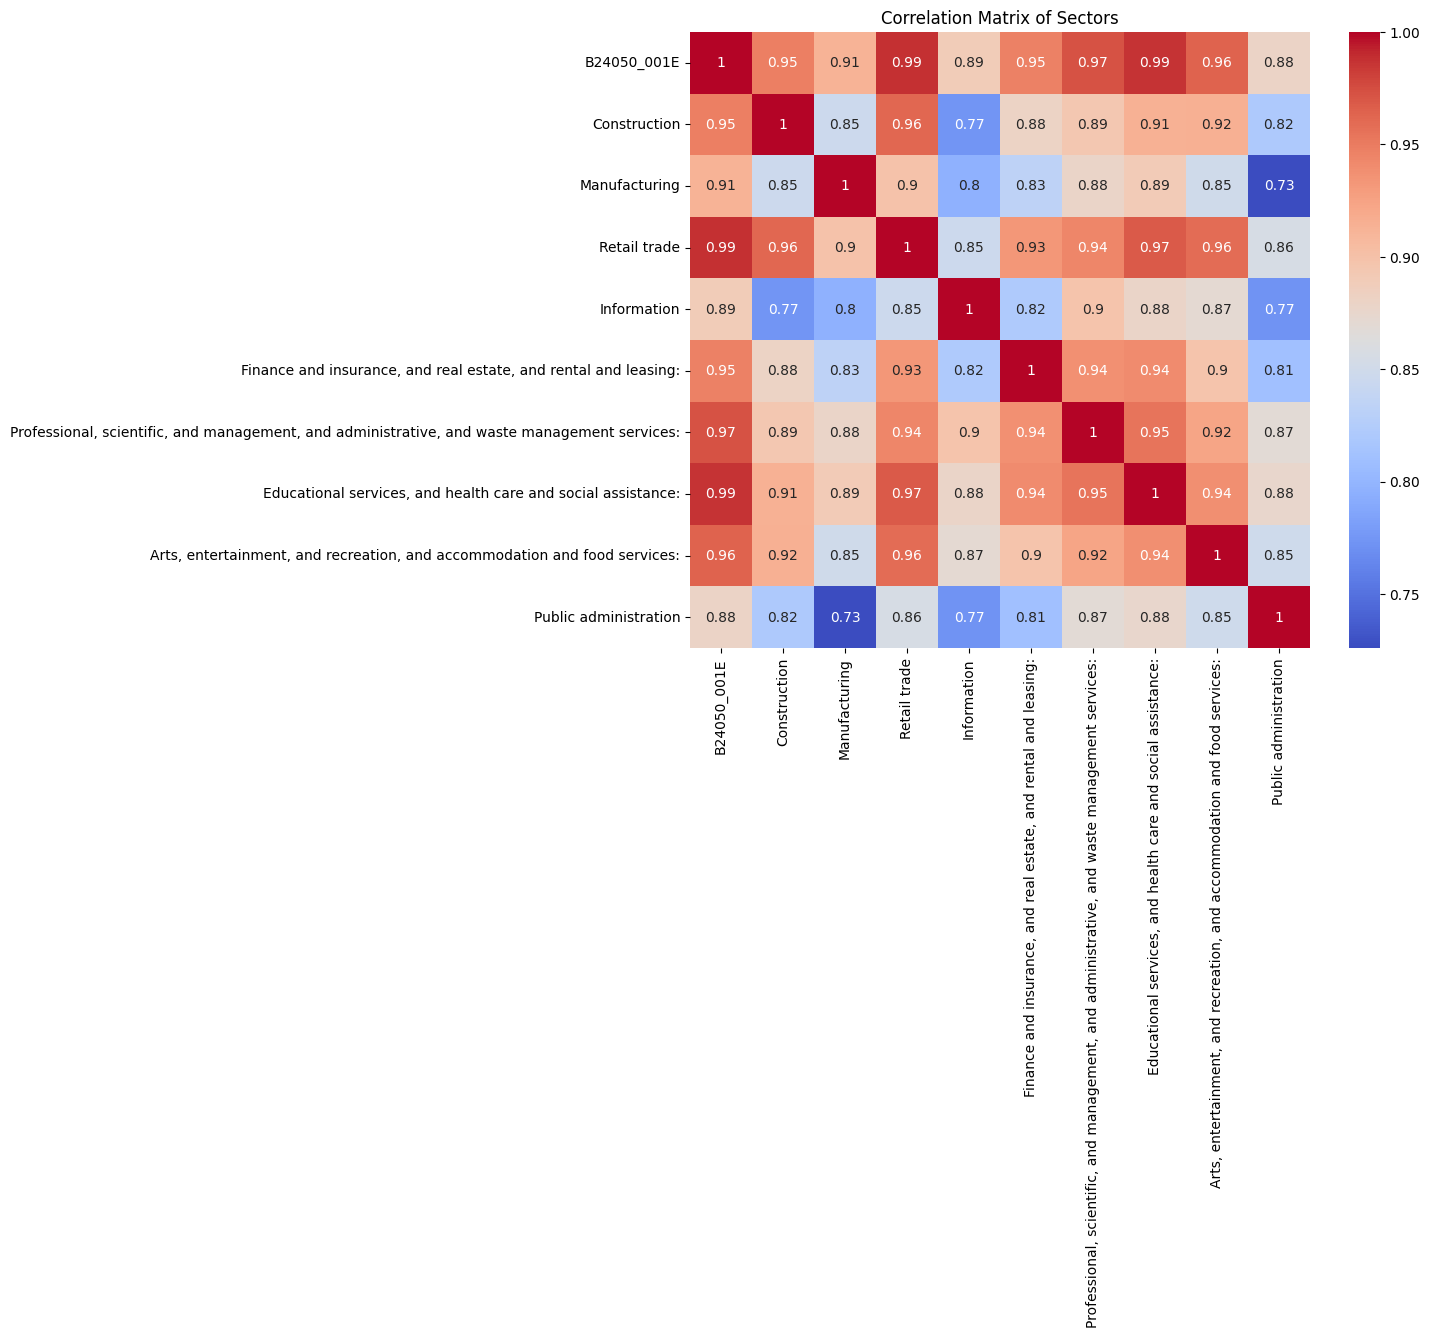

In [ ]:
# Correlation Analysis
correlation_matrix = sector_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sectors')
plt.show()


In [ ]:

# Dominant Sector Identification
dominant_sector = sector_data.drop('B24050_001E', axis=1).idxmax(axis=1)
dominant_sector_counts = dominant_sector.value_counts()
print("Dominant Sectors in Counties:\n", dominant_sector_counts)

Dominant Sectors in Counties:
 Educational services, and health care and social assistance:                                    392
Professional, scientific, and management, and administrative, and waste management services:     13
Manufacturing                                                                                    13
Arts, entertainment, and recreation, and accommodation and food services:                         5
Retail trade                                                                                      1
Public administration                                                                             1
dtype: int64


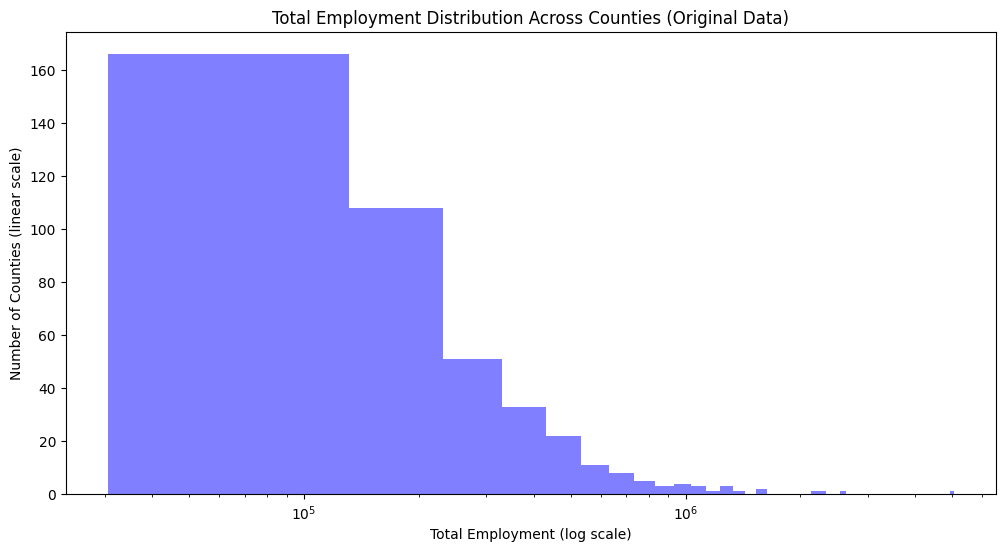

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['B24050_001E'], bins=50, alpha=0.5, color='blue', log=False)
plt.title('Total Employment Distribution Across Counties (Original Data)')
plt.xlabel('Total Employment (log scale)')
plt.ylabel('Number of Counties (linear scale)')
plt.xscale('log')
plt.yscale('linear')  # Switching to a linear scale for the y-axis
plt.show()


In [ ]:

# Outlier Detection in Key Sectors
manufacturing = sector_data['Manufacturing']
q1 = manufacturing.quantile(0.25)
q3 = manufacturing.quantile(0.75)
iqr = q3 - q1
outliers = manufacturing[(manufacturing < (q1 - 1.5 * iqr)) | (manufacturing > (q3 + 1.5 * iqr))]
print("Outliers in Manufacturing Sector:\n", outliers)

Outliers in Manufacturing Sector:
 9      159996
15      81227
20     433018
24     181466
26      96142
28      77715
29     154635
35     163866
106    250766
107     59905
109     58684
165     87490
178     68229
180     90898
183    124835
188    142748
191     84580
274     70677
361    101232
367    211704
378    110907
400    112347
415     72139
Name: Manufacturing, dtype: int64


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Cluster Analysis for Regional Grouping
def KmeansClustering(data,i=2):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    datasetName=""
    if(i==0):
      datasetName="MAX-Privacy"
    elif(i==1):
      datasetName="Max-Utility"
    else:
      datasetName="Original"



    # Determine optimal number of clusters (Elbow Method)
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title(f'Elbow Method for Optimal Number of Clusters for {datasetName}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Choose an appropriate number of clusters based on the plot
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(data_scaled)
    clusters = kmeans.labels_

    # Add cluster information to the original data
    data = data.assign(Cluster=clusters)



    # Applying PCA for dimensionality reduction to 2 dimensions
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Creating a DataFrame for the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = clusters
    cluster_summary = data.groupby('Cluster').mean()

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
    plt.title(f'Cluster Scatter Plot using PCA for {datasetName}')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap of Sector Means by Cluster for {datasetName}')
    plt.xlabel('Cluster')
    plt.ylabel('Sectors')
    plt.show()

    cluster_summary.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Average Sector Values in Each Cluster for {datasetName}')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.show()
    return cluster_summary



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

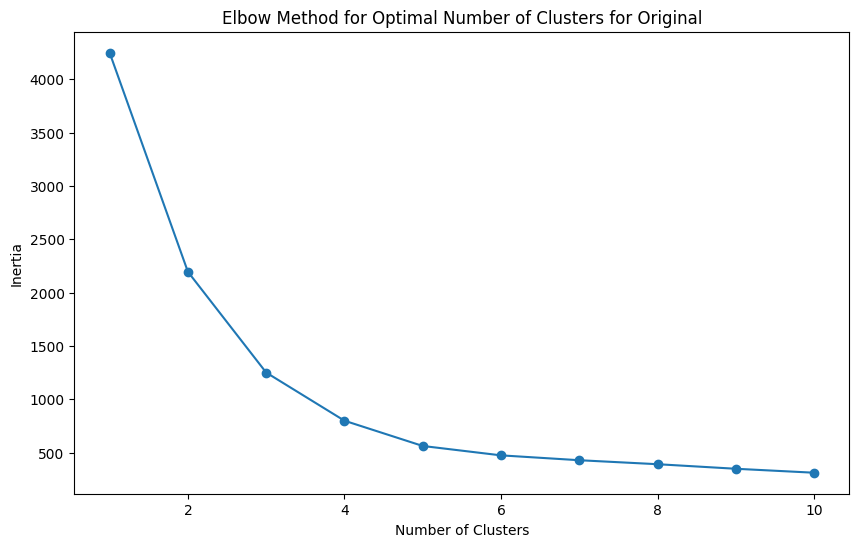

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


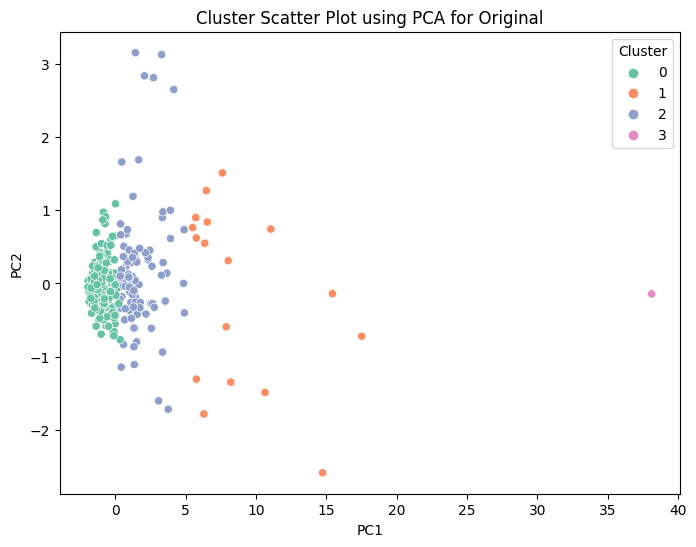

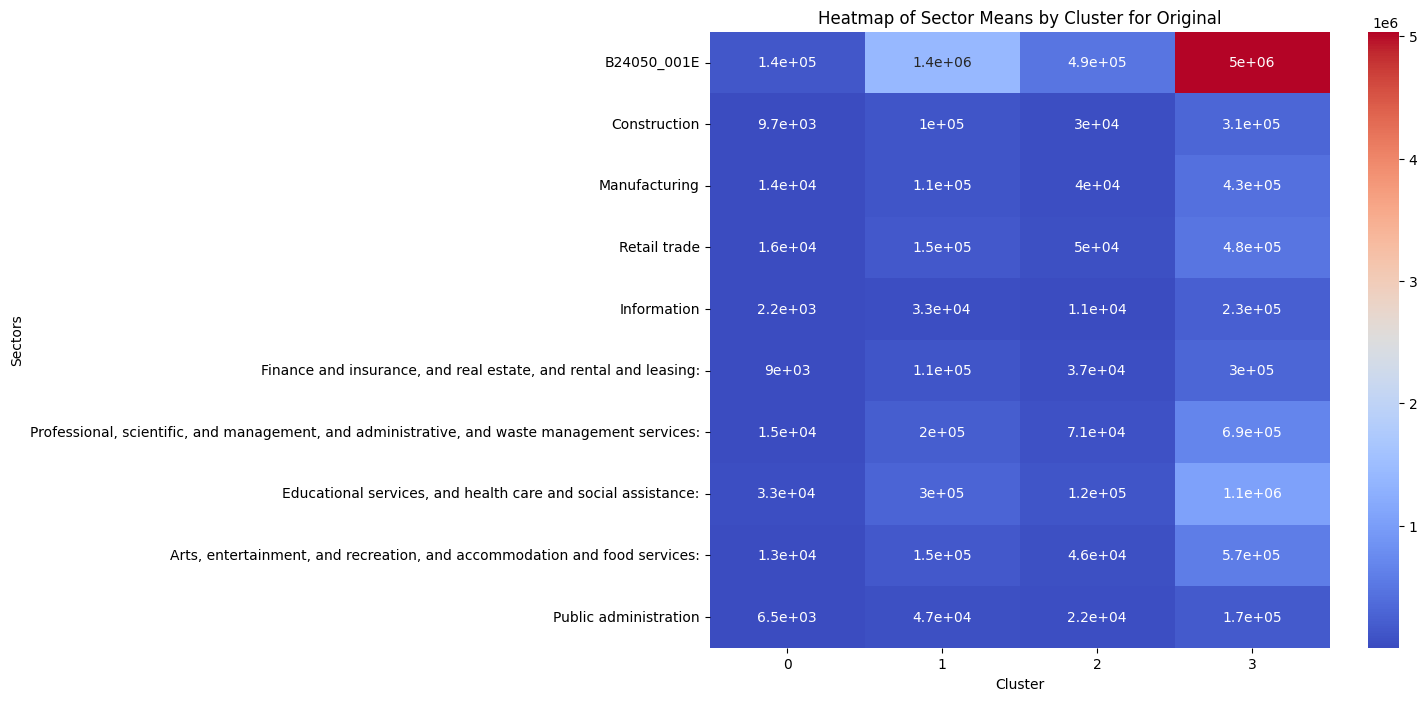

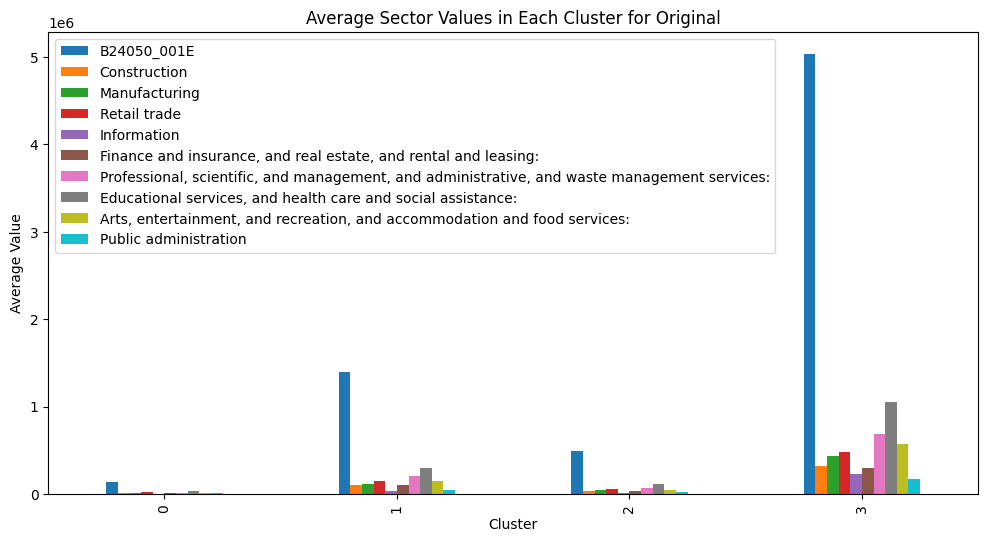

B24050_001E   Construction  Manufacturing   Retail trade  \
Cluster                                                              
0        1.392216e+05    9734.738170   14422.400631   15780.728707   
1        1.399376e+06  103098.411765  107506.941176  146494.058824   
2        4.894896e+05   30394.455556   39950.300000   49913.855556   
3        5.037815e+06  313721.000000  433018.000000  484548.000000   

           Information  \
Cluster                  
0          2184.179811   
1         32573.705882   
2         10640.044444   
3        226062.000000   

         Finance and insurance, and real estate, and rental and leasing:  \
Cluster                                                                    
0                                              8990.520505                 
1                                            106885.411765                 
2                                             37189.944444                 
3                                            298700.000000                 

         Professional, scientific, and management, and administrative, and waste management services:  \
Cluster                                                                                                 
0                                             15277.331230                                              
1                                            203144.117647                                              
2                                             71295.833333                                              
3                                            689827.000000                                              

         Educational services, and health care and social assistance:  \
Cluster                                                                 
0                                             3.328589e+04              
1                                             2.968992e+05              
2                                             1.154902e+05              
3                                             1.050067e+06              

         Arts, entertainment, and recreation, and accommodation and food services:  \
Cluster                                                                              
0                                             13423.577287                           
1                                            151414.411765                           
2                                             45859.466667                           
3                                            572709.000000                           

         Public administration  
Cluster                         
0                  6469.283912  
1                 46719.235294  
2                 21857.577778  
3                169118.000000

In [ ]:
KmeansClustering(sector_data)

In [ ]:
pip install python-dp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.3 MB/s eta 0:00:00


In [ ]:

import pydp as dp
from pydp.algorithms.laplacian import BoundedSum
dataset = data

key_sectors = [
    'Construction',
    'Manufacturing',
    'Retail trade',
    'Information',
    'Finance and insurance, and real estate, and rental and leasing:',
    'Professional, scientific, and management, and administrative, and waste management services:',
    'Educational services, and health care and social assistance:',
    'Arts, entertainment, and recreation, and accommodation and food services:',
    'Public administration',
    'Other services, except public administration'
]
epsilon_values = {sector: 1.0 for sector in key_sectors}

dp_results = {}


for sector in key_sectors:

    sector_data = dataset[sector].dropna().clip(lower=0)


    bounded_sum = BoundedSum(
        epsilon=epsilon_values[sector],
        lower_bound=sector_data.min(),
        upper_bound=sector_data.max()
    )


    for value in sector_data:
        bounded_sum.add_entry(value)


    dp_sum = bounded_sum.result()
    dp_results[sector] = dp_sum


for sector, dp_sum in dp_results.items():
    print(f"Differentially Private Sum for {sector}: {dp_sum}")


Differentially Private Sum for Construction: 7647627
Differentially Private Sum for Manufacturing: 10351086
Differentially Private Sum for Retail trade: 11216223
Differentially Private Sum for Information: 2417107
Differentially Private Sum for Finance and insurance, and real estate, and rental and leasing:: 8473836
Differentially Private Sum for Professional, scientific, and management, and administrative, and waste management services:: 15735364
Differentially Private Sum for Educational services, and health care and social assistance:: 27022073
Differentially Private Sum for Arts, entertainment, and recreation, and accommodation and food services:: 13063055
Differentially Private Sum for Public administration: 4921182
Differentially Private Sum for Other services, except public administration: 5977014


In [ ]:
from pydp.algorithms.laplacian import BoundedMean


original_means = {}

dp_means = {}
epsilon = 1.0
for sector in key_sectors:

    original_mean = dataset[sector].mean()
    original_means[sector] = original_mean


    # Differential Privacy - Bounded Mean
    sector_data = dataset[sector].dropna()
    bounded_mean = BoundedMean(epsilon, lower_bound=sector_data.min(), upper_bound=sector_data.max())
    for value in sector_data:
        bounded_mean.add_entry(value)

    # DP mean
    dp_mean = bounded_mean.result()
    dp_means[sector] = dp_mean

# Displaying the results
for sector in key_sectors:
    print(f"Sector: {sector}")
    print(f"  Original Mean: {original_means[sector]}")
    print(f"  DP Mean: {dp_means[sector]}\n")

Sector: Construction
  Original Mean: 18559.54588235294
  DP Mean: 13968.124700239801

Sector: Manufacturing
  Original Mean: 24536.621176470588
  DP Mean: 25501.59767441862

Sector: Retail trade
  Original Mean: 29340.435294117648
  DP Mean: 26503.292161520192

Sector: Information
  Original Mean: 5717.185882352941
  DP Mean: 5379.594339622636

Sector: Finance and insurance, and real estate, and rental and leasing:
  Original Mean: 19559.628235294116
  DP Mean: 19227.322352941177

Sector: Professional, scientific, and management, and administrative, and waste management services:
  Original Mean: 36241.92
  DP Mean: 36091.0588235294

Sector: Educational services, and health care and social assistance:
  Original Mean: 63630.821176470585
  DP Mean: 60300.355450236995

Sector: Arts, entertainment, and recreation, and accommodation and food services:
  Original Mean: 27127.95294117647
  DP Mean: 27499.805424528313

Sector: Public administration
  Original Mean: 11720.682352941176
  DP Me

In [ ]:
pip install diffprivlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from diffprivlib.tools import mean



epsilon = 1.0

sector_bounds = (data['Construction'].min(), data['Construction'].max())

# Calculating differentially private mean
dp_mean = mean(data['Construction'], epsilon=epsilon, bounds=sector_bounds)

print(f"Differentially private mean of sector Construction: {dp_mean}")


Differentially private mean of sector Construction: 15492.666878564363


In [ ]:
from diffprivlib.tools import var

sector = 'Manufacturing'


epsilon = 1.0


sector_bounds = (data[sector].min(), data[sector].max())


dp_variance = var(data[sector], epsilon=epsilon, bounds=sector_bounds)

print(f"Differentially private variance of {sector} sector: {dp_variance}")


Differentially private variance of Manufacturing sector: 1043943003.906703


In [ ]:
epsilons = [0.1, 0.5, 1.0, 5.0, 10.0]
dp_variances = []

for eps in epsilons:
    dp_var = var(data[sector], epsilon=eps, bounds=sector_bounds)
    dp_variances.append(dp_var)


for eps, dp_var in zip(epsilons, dp_variances):
    print(f"Epsilon: {eps}, DP Variance: {dp_var}")


Epsilon: 0.1, DP Variance: 5129253319.02693
Epsilon: 0.5, DP Variance: 169366456.87833035
Epsilon: 1.0, DP Variance: 934899533.5135959
Epsilon: 5.0, DP Variance: 1055740435.6098353
Epsilon: 10.0, DP Variance: 1141229738.1741705


In [ ]:
# Original variance
original_variance = data[sector].var()


print(f"Original Variance: {original_variance}")
print(f"Differentially Private Variance (ε={epsilon}): {dp_variance}")


Original Variance: 1151850828.6509655
Differentially Private Variance (ε=1.0): 1043943003.906703


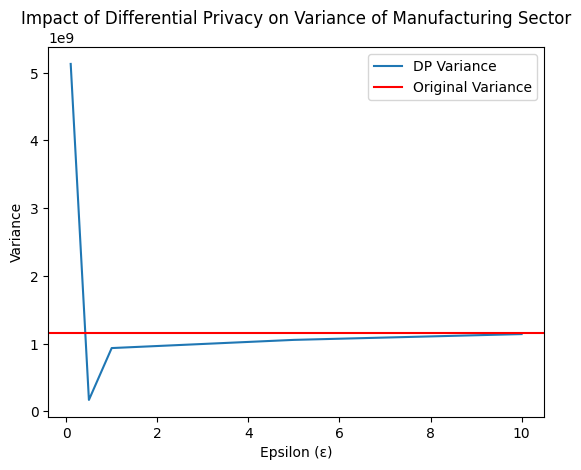

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(epsilons, dp_variances, label='DP Variance')
plt.axhline(y=original_variance, color='r', linestyle='-', label='Original Variance')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Variance')
plt.title(f'Impact of Differential Privacy on Variance of {sector} Sector')
plt.legend()
plt.show()


In [ ]:
from diffprivlib.tools import std


sector = 'Manufacturing'


epsilon = 1.0

# Bounds for the Manufacturing sector data
sector_bounds = (data[sector].min(), data[sector].max())


dp_std = std(data[sector], epsilon=epsilon, bounds=sector_bounds)

print(f"Differentially private standard deviation of {sector} sector: {dp_std}")


Differentially private standard deviation of Manufacturing sector: 22976.518319845654


In [ ]:
epsilons = [0.1, 0.5, 1.0, 5.0, 10.0]
dp_stds = []

for eps in epsilons:
    dp_sd = std(data[sector], epsilon=eps, bounds=sector_bounds)
    dp_stds.append(dp_sd)


for eps, dp_sd in zip(epsilons, dp_stds):
    print(f"Epsilon: {eps}, DP Std Dev: {dp_sd}")


Epsilon: 0.1, DP Std Dev: 95363.83394776896
Epsilon: 0.5, DP Std Dev: 45031.978553848836
Epsilon: 1.0, DP Std Dev: 37122.43036680629
Epsilon: 5.0, DP Std Dev: 34187.29241306295
Epsilon: 10.0, DP Std Dev: 34622.33497434763


In [ ]:
# Original standard deviation
original_std = data[sector].std()

# Print comparison
print(f"Original Standard Deviation: {original_std}")
print(f"Differentially Private Standard Deviation (ε={epsilon}): {dp_std}")


Original Standard Deviation: 33938.92792430199
Differentially Private Standard Deviation (ε=1.0): 22976.518319845654


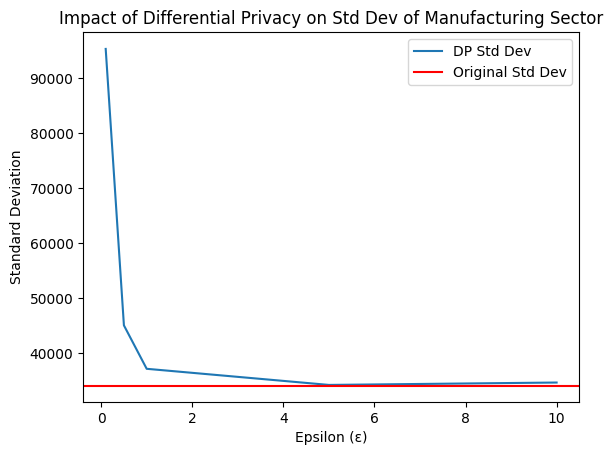

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(epsilons, dp_stds, label='DP Std Dev')
plt.axhline(y=original_std, color='r', linestyle='-', label='Original Std Dev')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Standard Deviation')
plt.title(f'Impact of Differential Privacy on Std Dev of {sector} Sector')
plt.legend()
plt.show()


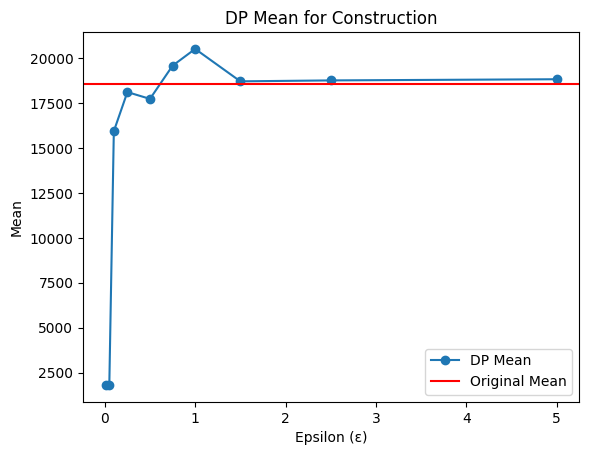

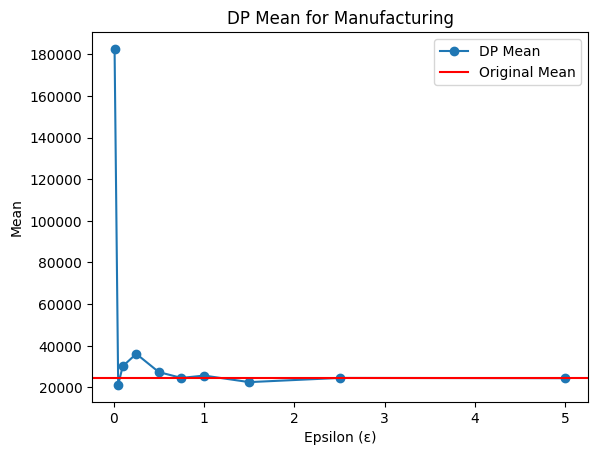

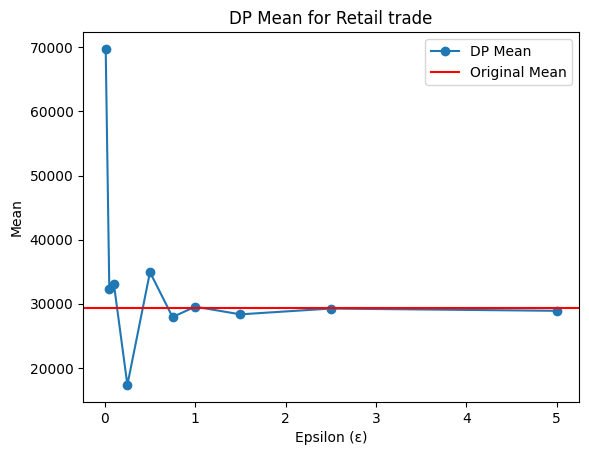

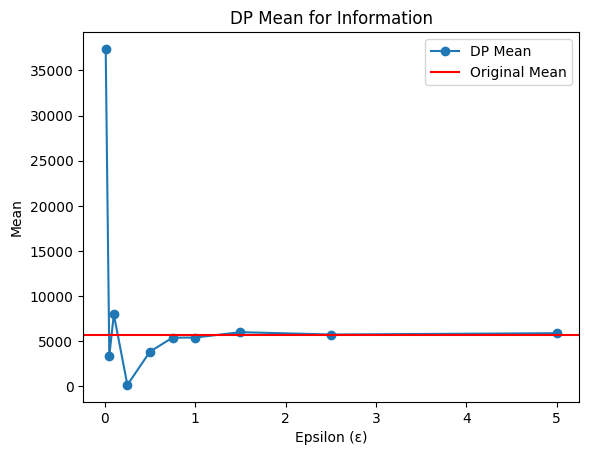

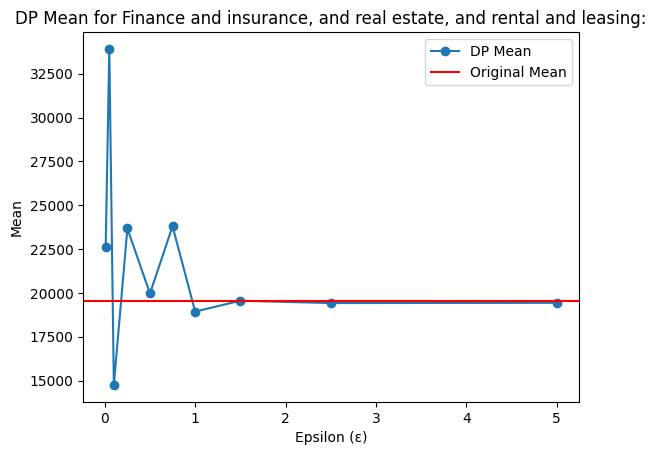

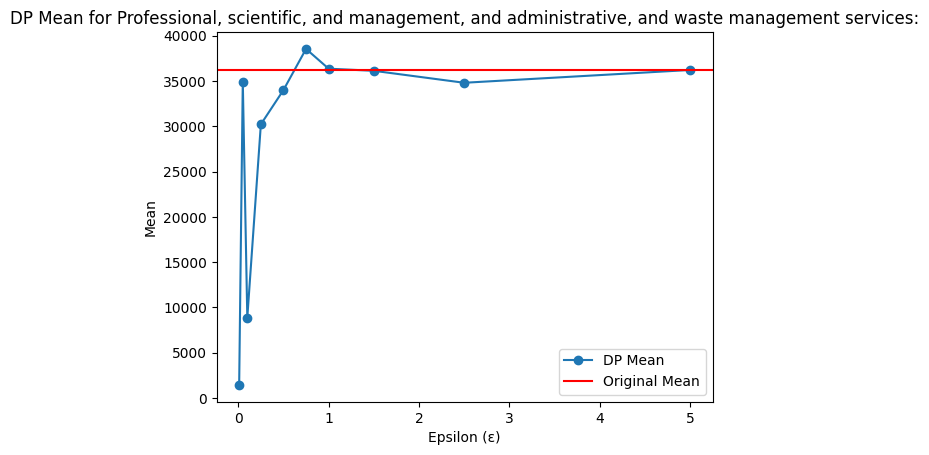

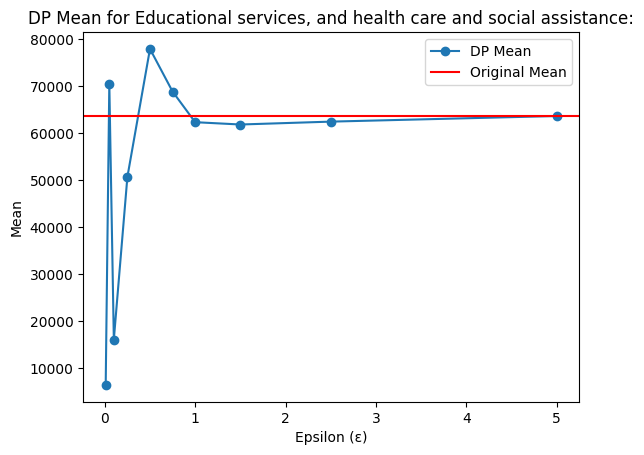

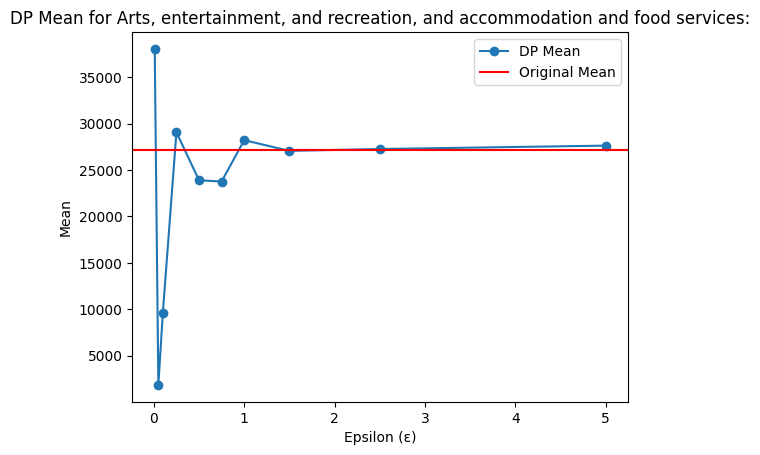

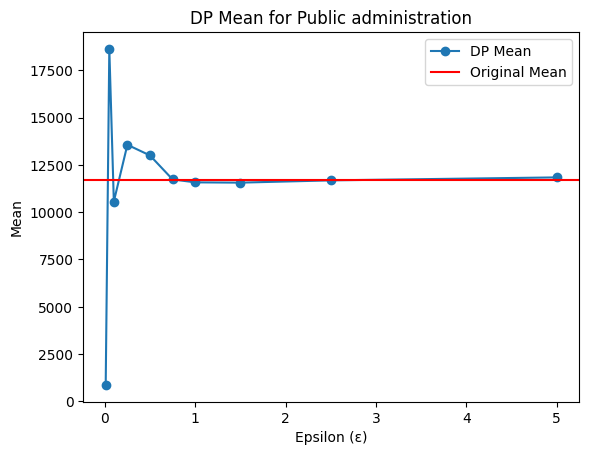

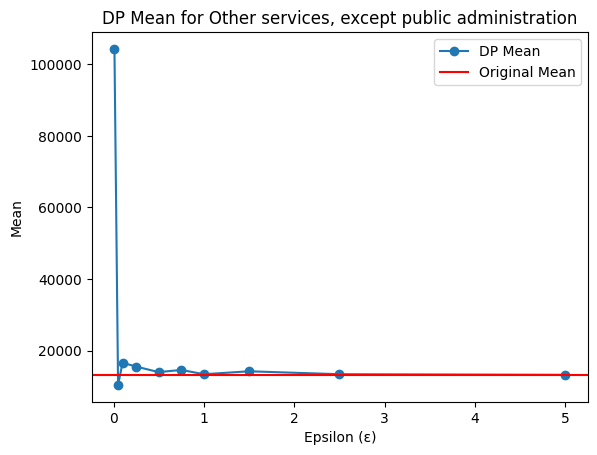

Differentially Private Means Across Sectors:


0.01  \
Construction                                               1822.0   
Manufacturing                                       182570.572477   
Retail trade                                         69759.806339   
Information                                          37388.511527   
Finance and insurance, and real estate, and ren...   22637.252328   
Professional, scientific, and management, and a...         1435.0   
Educational services, and health care and socia...         6407.0   
Arts, entertainment, and recreation, and accomm...   38046.458482   
Public administration                                       873.0   
Other services, except public administration        104283.308215   

                                                            0.05  \
Construction                                              1822.0   
Manufacturing                                        21206.31282   
Retail trade                                         32260.21271   
Information                                          3382.033987   
Finance and insurance, and real estate, and ren...  33911.795988   
Professional, scientific, and management, and a...  34934.273564   
Educational services, and health care and socia...  70462.706886   
Arts, entertainment, and recreation, and accomm...        1840.0   
Public administration                               18624.659027   
Other services, except public administration        10423.443414   

                                                            0.10  \
Construction                                        15926.855764   
Manufacturing                                       30163.388796   
Retail trade                                        33146.708191   
Information                                          7967.161454   
Finance and insurance, and real estate, and ren...  14752.664839   
Professional, scientific, and management, and a...    8874.44382   
Educational services, and health care and socia...  16061.959803   
Arts, entertainment, and recreation, and accomm...   9641.016815   
Public administration                               10562.533662   
Other services, except public administration        16619.058815   

                                                            0.25  \
Construction                                        18100.350943   
Manufacturing                                       36130.842782   
Retail trade                                        17339.546525   
Information                                           153.697576   
Finance and insurance, and real estate, and ren...   23672.66267   
Professional, scientific, and management, and a...  30214.614701   
Educational services, and health care and socia...  50674.705158   
Arts, entertainment, and recreation, and accomm...  29066.672545   
Public administration                               13560.633078   
Other services, except public administration        15545.438949   

                                                            0.50  \
Construction                                        17722.405678   
Manufacturing                                       27365.816041   
Retail trade                                        34928.319695   
Information                                          3846.909186   
Finance and insurance, and real estate, and ren...  19965.934014   
Professional, scientific, and management, and a...  34001.233636   
Educational services, and health care and socia...  77921.946478   
Arts, entertainment, and recreation, and accomm...  23892.098045   
Public administration                               12997.178236   
Other services, except public administration        14002.587608   

                                                            0.75  \
Construction                                         19566.64705   
Manufacturing                                        24566.01546   
Retail trade                                        27927.511762   
Information                      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from diffprivlib.tools import mean



epsilons =ϵ=[0.01,0.05,0.1,0.25,0.5,0.75,1.0,1.5,2.5,5.0]



dp_means_results = pd.DataFrame(index=key_sectors, columns=epsilons)

# Calculate DP mean for each sector and epsilon
for sector in key_sectors:
    original_mean = data[sector].mean()
    sector_bounds = (data[sector].min(), data[sector].max())

    for eps in epsilons:
        dp_mean_value = mean(data[sector], epsilon=eps, bounds=sector_bounds)
        dp_means_results.at[sector, eps] = dp_mean_value

    # Plot the DP mean for the sector
    plt.plot(epsilons, dp_means_results.loc[sector], label='DP Mean', marker='o')
    plt.axhline(y=original_mean, color='r', linestyle='-', label='Original Mean')
    plt.title(f'DP Mean for {sector}')
    plt.xlabel('Epsilon (ε)')
    plt.ylabel('Mean')
    plt.legend()
    plt.show()

# Display the DP means table
print("Differentially Private Means Across Sectors:")
display(dp_means_results)


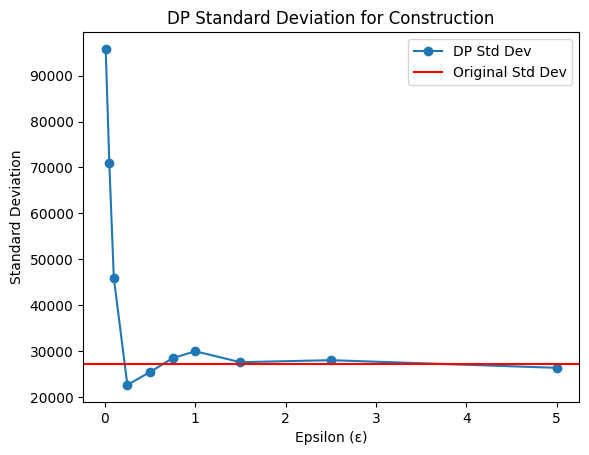

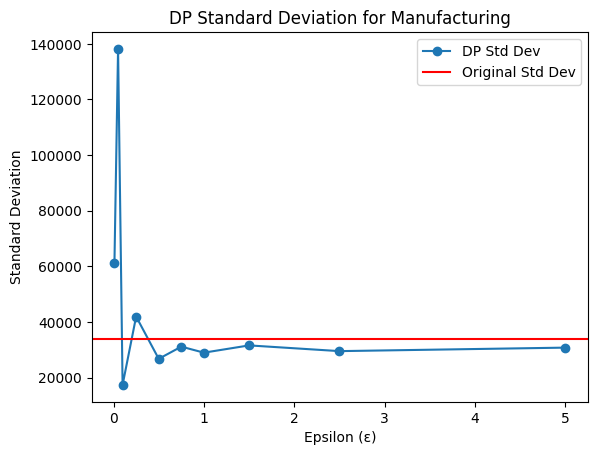

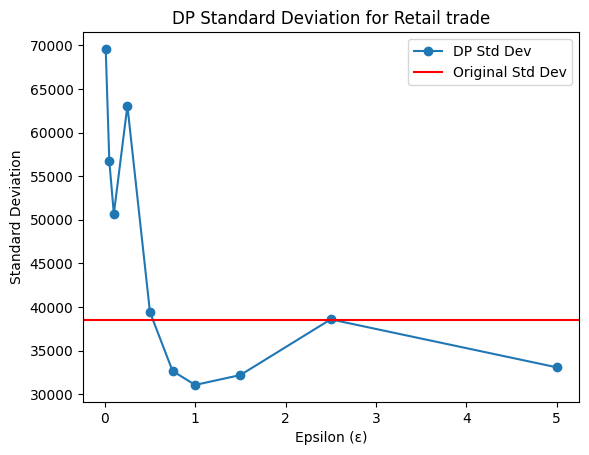

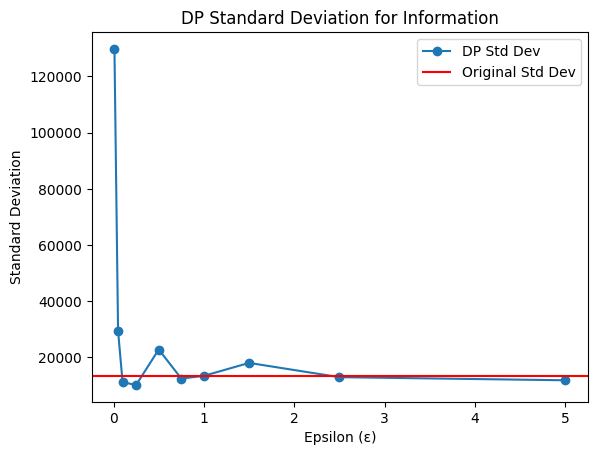

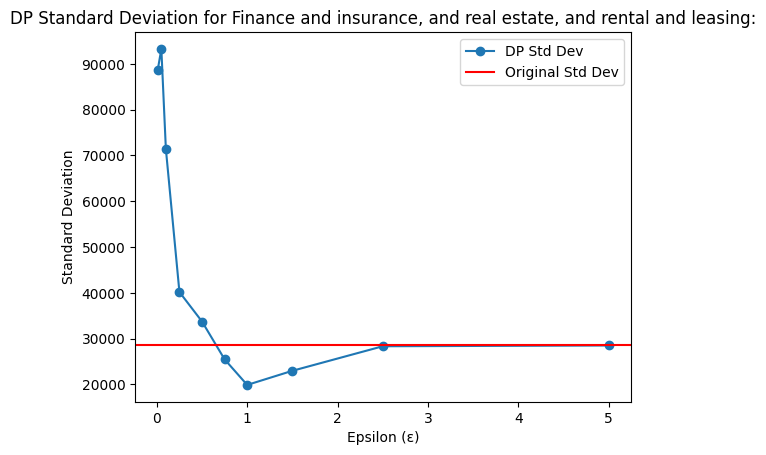

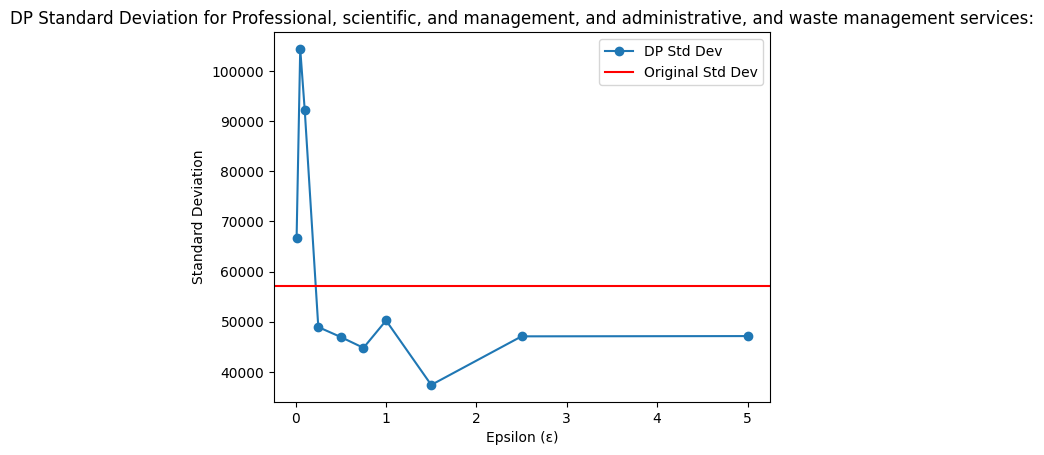

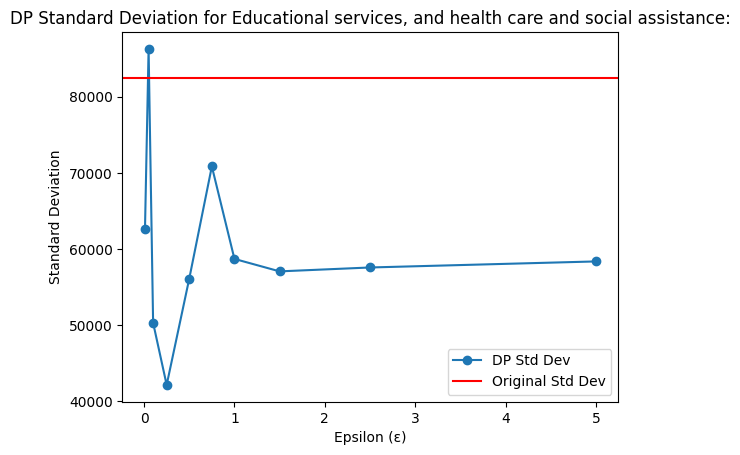

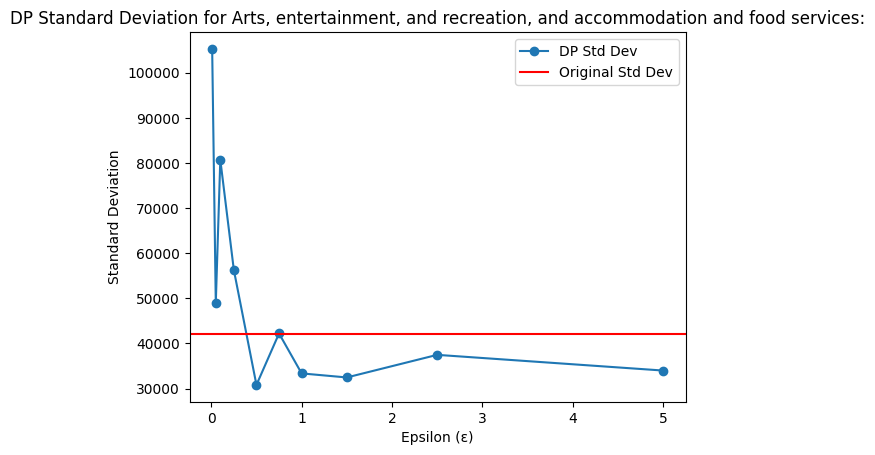

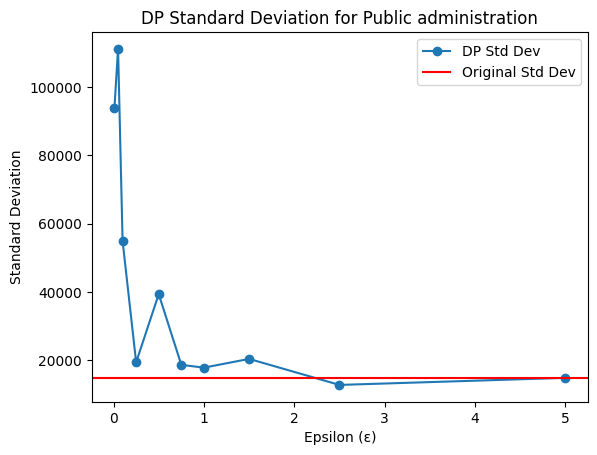

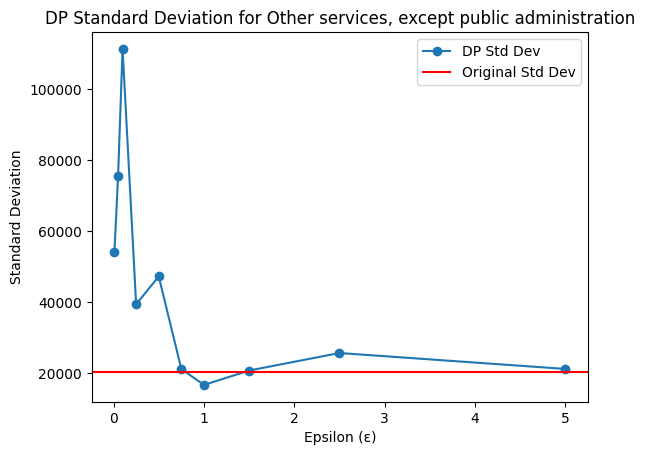

Differentially Private Standard Deviations Across Sectors:


0.01  \
Construction                                         95786.319225   
Manufacturing                                        61349.757974   
Retail trade                                         69597.473067   
Information                                         129796.991452   
Finance and insurance, and real estate, and ren...   88675.266748   
Professional, scientific, and management, and a...   66786.250403   
Educational services, and health care and socia...   62596.152778   
Arts, entertainment, and recreation, and accomm...  105259.058187   
Public administration                                93922.662296   
Other services, except public administration         54110.839124   

                                                             0.05  \
Construction                                         70931.553549   
Manufacturing                                       138166.353499   
Retail trade                                         56740.581609   
Information                                          29435.155678   
Finance and insurance, and real estate, and ren...   93259.367017   
Professional, scientific, and management, and a...  104373.186391   
Educational services, and health care and socia...   86272.042221   
Arts, entertainment, and recreation, and accomm...   48913.693202   
Public administration                               111194.827315   
Other services, except public administration         75369.684394   

                                                             0.10  \
Construction                                         45946.281155   
Manufacturing                                        17403.077995   
Retail trade                                         50676.901534   
Information                                          11132.148638   
Finance and insurance, and real estate, and ren...   71420.698887   
Professional, scientific, and management, and a...   92148.708856   
Educational services, and health care and socia...   50294.979459   
Arts, entertainment, and recreation, and accomm...    80715.16898   
Public administration                                55008.976997   
Other services, except public administration        111290.155765   

                                                            0.25  \
Construction                                        22712.860006   
Manufacturing                                       41971.566066   
Retail trade                                         63065.95375   
Information                                         10177.326663   
Finance and insurance, and real estate, and ren...  40178.870211   
Professional, scientific, and management, and a...  48940.023438   
Educational services, and health care and socia...  42138.293297   
Arts, entertainment, and recreation, and accomm...  56261.725397   
Public administration                               19431.777089   
Other services, except public administration        39337.346184   

                                                            0.50  \
Construction                                        25512.547778   
Manufacturing                                       26779.316011   
Retail trade                                        39397.651398   
Information                                         22785.935144   
Finance and insurance, and real estate, and ren...  33732.730849   
Professional, scientific, and management, and a...  46944.124333   
Educational services, and health care and socia...  56101.204678   
Arts, entertainment, and recreation, and accomm...  30812.031482   
Public administration                               39404.785006   
Other services, except public administration        47211.441442   

                                                            0.75  \
Construction                                        28517.306085   
Manufacturing                                       31161.709249   
Retail trade                                        32656.962085   
Information

In [ ]:
from diffprivlib.tools import std

# Store DP standard deviations for all sectors and epsilon values
dp_stds_results = pd.DataFrame(index=key_sectors, columns=epsilons)

# Calculate DP standard deviation for each sector and epsilon
for sector in key_sectors:
    original_std = data[sector].std()

    for eps in epsilons:
        dp_std_value = std(data[sector], epsilon=eps, bounds=sector_bounds)
        dp_stds_results.at[sector, eps] = dp_std_value

    # Plot the DP standard deviation for the sector
    plt.plot(epsilons, dp_stds_results.loc[sector], label='DP Std Dev', marker='o')
    plt.axhline(y=original_std, color='r', linestyle='-', label='Original Std Dev')
    plt.title(f'DP Standard Deviation for {sector}')
    plt.xlabel('Epsilon (ε)')
    plt.ylabel('Standard Deviation')
    plt.legend()
    plt.show()

# Display the DP standard deviations table
print("Differentially Private Standard Deviations Across Sectors:")
display(dp_stds_results)


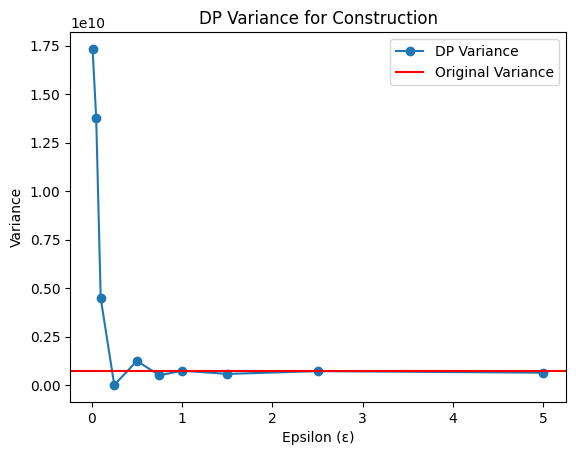

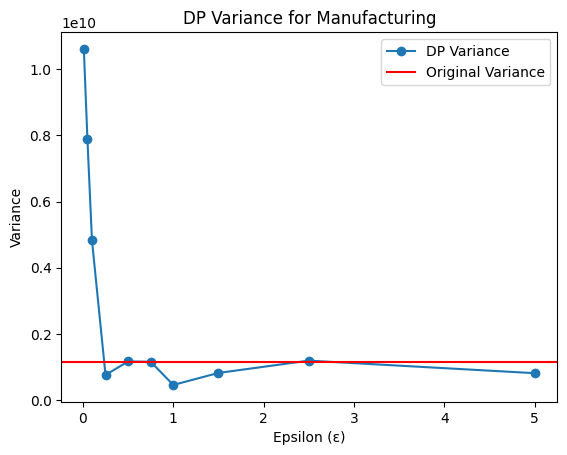

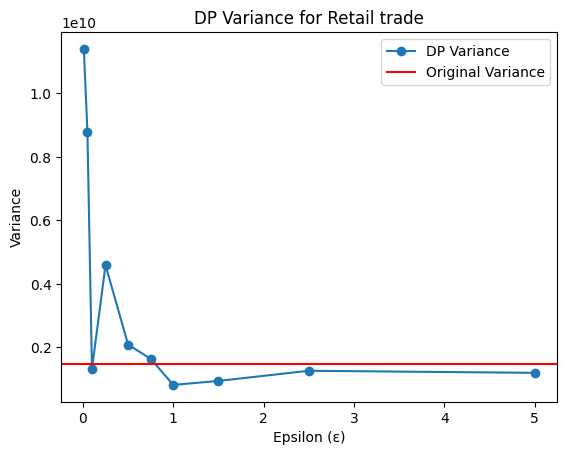

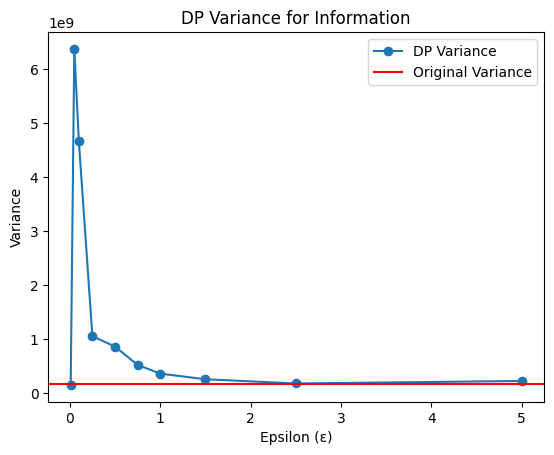

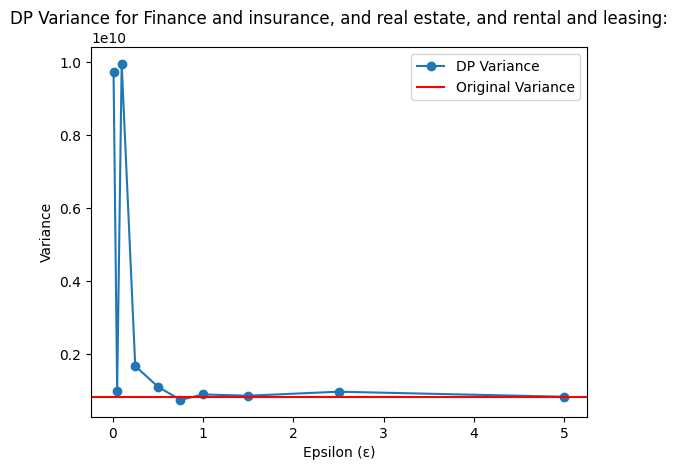

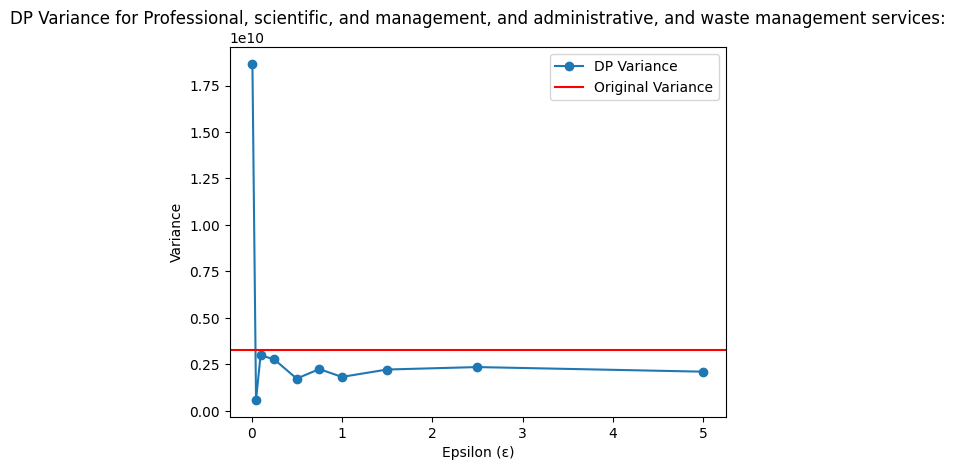

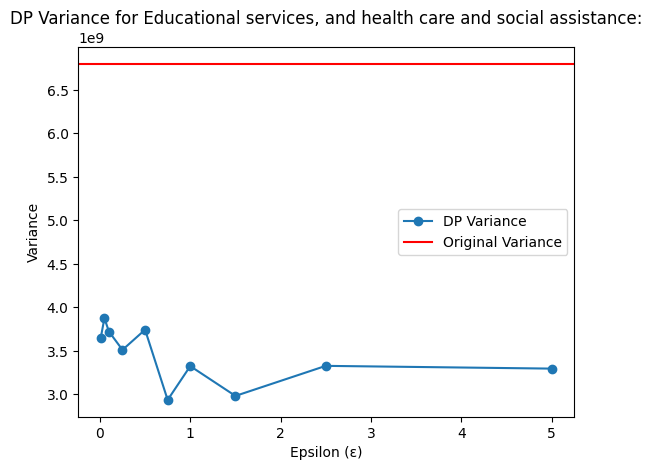

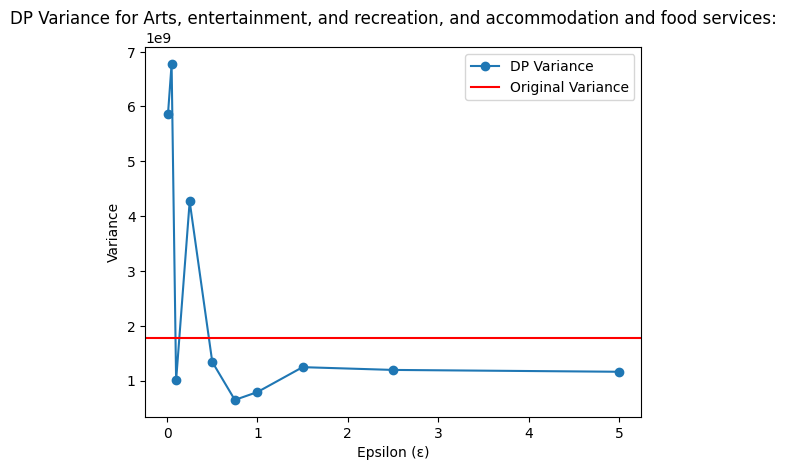

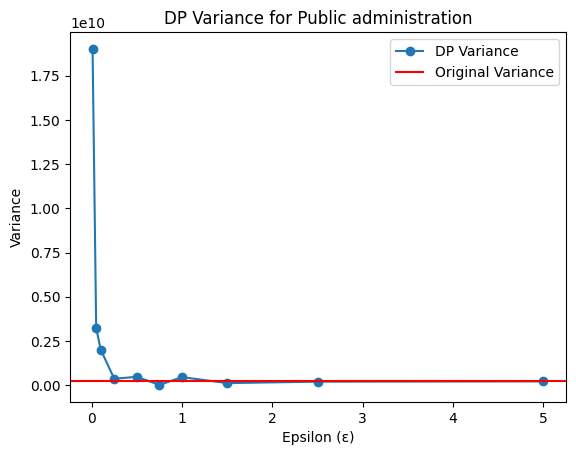

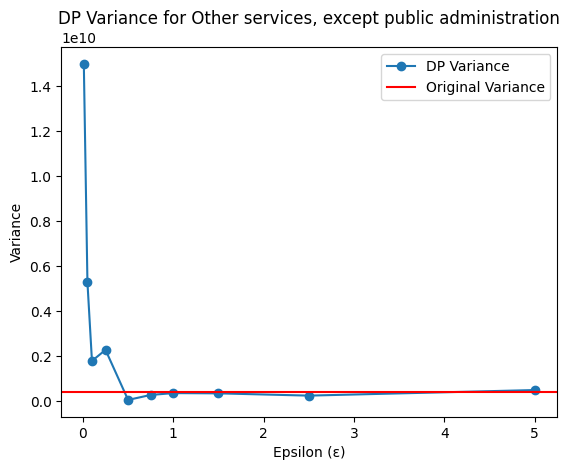

Differentially Private Variances Across Sectors:


0.01  \
Construction                                        17334945653.489674   
Manufacturing                                       10614145118.558811   
Retail trade                                        11399843553.463207   
Information                                           154259182.854398   
Finance and insurance, and real estate, and ren...   9729977628.592476   
Professional, scientific, and management, and a...  18665661693.419933   
Educational services, and health care and socia...   3650486607.842277   
Arts, entertainment, and recreation, and accomm...   5858830562.629751   
Public administration                               19014698166.624969   
Other services, except public administration        14985195572.144243   

                                                                  0.05  \
Construction                                        13797200124.309824   
Manufacturing                                        7878644868.830532   
Retail trade                                         8783208427.444557   
Information                                          6377742220.926922   
Finance and insurance, and real estate, and ren...    974456267.311461   
Professional, scientific, and management, and a...      578285729.1951   
Educational services, and health care and socia...   3874162043.386808   
Arts, entertainment, and recreation, and accomm...   6775767874.422809   
Public administration                                3227466030.200448   
Other services, except public administration         5279246307.923232   

                                                                 0.10  \
Construction                                        4488320044.422422   
Manufacturing                                       4832303141.128072   
Retail trade                                        1323093301.527555   
Information                                         4671074980.165236   
Finance and insurance, and real estate, and ren...   9950949233.66824   
Professional, scientific, and management, and a...  2976674396.105816   
Educational services, and health care and socia...  3720374599.611767   
Arts, entertainment, and recreation, and accomm...  1002790722.111199   
Public administration                               2008114567.021539   
Other services, except public administration        1791209291.185655   

                                                                 0.25  \
Construction                                          18291592.891752   
Manufacturing                                        760300338.589551   
Retail trade                                        4591879932.005201   
Information                                         1056962642.836588   
Finance and insurance, and real estate, and ren...  1662057813.405847   
Professional, scientific, and management, and a...   2766848973.54746   
Educational services, and health care and socia...  3509536844.605281   
Arts, entertainment, and recreation, and accomm...  4267703021.115891   
Public administration                                357641157.896093   
Other services, except public administration        2281511576.531419   

                                                                 0.50  \
Construction                                        1251279934.810849   
Manufacturing                                       1169263546.452748   
Retail trade                                        2091212601.648867   
Information                                          865514621.019639   
Finance and insurance, and real estate, and ren...  1096119793.250126   
Professional, scientific, and management, and a...  1724990745.845668   
Educational services, and health care and socia...  3741534623.904526   
Arts, entertainment, and recreation, and accomm...   1339488287.59614   
Public administration                                470136411.003218   
Other services, except public administration          58703450.432654   

                        

In [ ]:
from diffprivlib.tools import var

# Store DP variances for all sectors and epsilon values
dp_vars_results = pd.DataFrame(index=key_sectors, columns=epsilons)

# Calculate DP variance for each sector and epsilon
for sector in key_sectors:
    original_var = data[sector].var()

    for eps in epsilons:
        dp_var_value = var(data[sector], epsilon=eps, bounds=sector_bounds)
        dp_vars_results.at[sector, eps] = dp_var_value

    # Plot the DP variance for the sector
    plt.plot(epsilons, dp_vars_results.loc[sector], label='DP Variance', marker='o')
    plt.axhline(y=original_var, color='r', linestyle='-', label='Original Variance')
    plt.title(f'DP Variance for {sector}')
    plt.xlabel('Epsilon (ε)')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()

# Display the DP variances table
print("Differentially Private Variances Across Sectors:")
display(dp_vars_results)


In [ ]:

utility_epsilons_mean = {}

for sector in dp_means_results.index:
    # Finding the epsilon with the minimum difference from the original mean
    original_mean = data[sector].mean()
    differences = dp_means_results.loc[sector].apply(lambda dp_mean: abs(dp_mean - original_mean))
    utility_epsilons_mean[sector] = differences.idxmin()

# Display the best epsilon for mean for each sector
print("Best Epsilon for Mean Across Sectors for maximum utility:")
print(utility_epsilons_mean)


Best Epsilon for Mean Across Sectors for maximum utility:
{'Construction': 1.5, 'Manufacturing': 2.5, 'Retail trade': 2.5, 'Information': 2.5, 'Finance and insurance, and real estate, and rental and leasing:': 1.5, 'Professional, scientific, and management, and administrative, and waste management services:': 5.0, 'Educational services, and health care and social assistance:': 5.0, 'Arts, entertainment, and recreation, and accommodation and food services:': 1.5, 'Public administration': 0.75, 'Other services, except public administration': 5.0}


In [ ]:
private_epsilons_mean = {}

for sector in dp_means_results.index:
    # Finding the epsilon with the minimum difference from the original mean
    original_mean = data[sector].mean()
    differences = dp_means_results.loc[sector].apply(lambda dp_mean: abs(dp_mean - original_mean))
    private_epsilons_mean[sector] = differences.idxmax()

# Display the best epsilon for mean for each sector
print("Best Epsilon for Mean Across Sectors for maximum privacy:")
print(private_epsilons_mean)

Best Epsilon for Mean Across Sectors for maximum privacy:
{'Construction': 0.01, 'Manufacturing': 0.01, 'Retail trade': 0.01, 'Information': 0.01, 'Finance and insurance, and real estate, and rental and leasing:': 0.05, 'Professional, scientific, and management, and administrative, and waste management services:': 0.01, 'Educational services, and health care and social assistance:': 0.01, 'Arts, entertainment, and recreation, and accommodation and food services:': 0.05, 'Public administration': 0.01, 'Other services, except public administration': 0.01}


In [ ]:

utility_epsilons_std = {}

for sector in dp_stds_results.index:
    # Finding the epsilon with the minimum difference from the original standard deviation
    original_std = data[sector].std()
    differences = dp_stds_results.loc[sector].apply(lambda dp_std: abs(dp_std - original_std))
    utility_epsilons_std[sector] = differences.idxmin()

# Display the best epsilon for standard deviation for each sector
print("Best Epsilon for Standard Deviation Across Sectors for maximum utility:")
print(utility_epsilons_std)


Best Epsilon for Standard Deviation Across Sectors for maximum utility:
{'Construction': 1.5, 'Manufacturing': 1.5, 'Retail trade': 2.5, 'Information': 1.0, 'Finance and insurance, and real estate, and rental and leasing:': 5.0, 'Professional, scientific, and management, and administrative, and waste management services:': 1.0, 'Educational services, and health care and social assistance:': 0.05, 'Arts, entertainment, and recreation, and accommodation and food services:': 0.75, 'Public administration': 5.0, 'Other services, except public administration': 1.5}


In [ ]:

private_epsilons_std = {}

for sector in dp_stds_results.index:
    # Finding the epsilon with the minimum difference from the original standard deviation
    original_std = data[sector].std()
    differences = dp_stds_results.loc[sector].apply(lambda dp_std: abs(dp_std - original_std))
    private_epsilons_std[sector] = differences.idxmax()

# Display the best epsilon for standard deviation for each sector
print("Best Epsilon for Standard Deviation Across Sectors:")
print(private_epsilons_std)

Best Epsilon for Standard Deviation Across Sectors:
{'Construction': 0.01, 'Manufacturing': 0.05, 'Retail trade': 0.01, 'Information': 0.01, 'Finance and insurance, and real estate, and rental and leasing:': 0.05, 'Professional, scientific, and management, and administrative, and waste management services:': 0.05, 'Educational services, and health care and social assistance:': 0.25, 'Arts, entertainment, and recreation, and accommodation and food services:': 0.01, 'Public administration': 0.05, 'Other services, except public administration': 0.1}


In [ ]:

best_epsilons_var = {}

for sector in dp_vars_results.index:
    # Finding the epsilon with the minimum difference from the original variance
    original_var = data[sector].var()
    differences = dp_vars_results.loc[sector].apply(lambda dp_var: abs(dp_var - original_var))
    best_epsilons_var[sector] = differences.idxmin()

# Display the best epsilon for variance for each sector
print("Best Epsilon for Variance Across Sectors:")
print(best_epsilons_var)


Best Epsilon for Variance Across Sectors:
{'Construction': 2.5, 'Manufacturing': 0.75, 'Retail trade': 0.75, 'Information': 2.5, 'Finance and insurance, and real estate, and rental and leasing:': 5.0, 'Professional, scientific, and management, and administrative, and waste management services:': 0.1, 'Educational services, and health care and social assistance:': 0.05, 'Arts, entertainment, and recreation, and accommodation and food services:': 0.5, 'Public administration': 5.0, 'Other services, except public administration': 1.0}


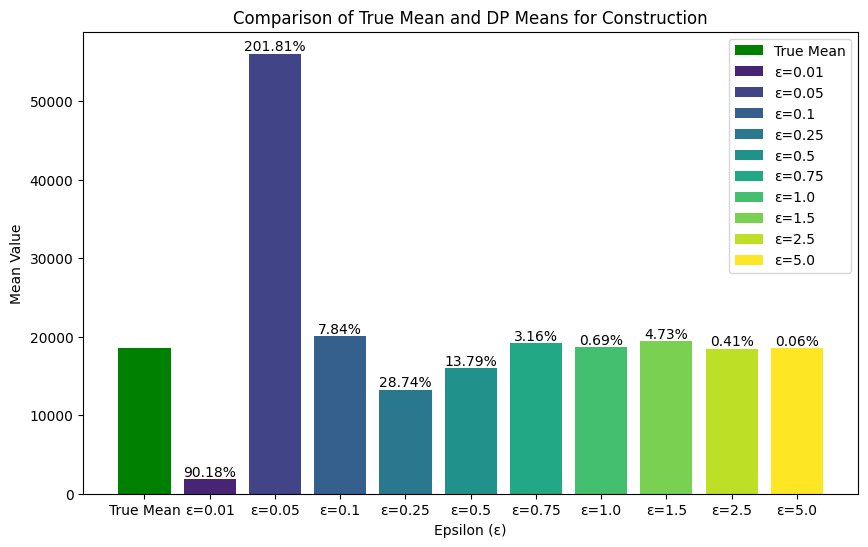

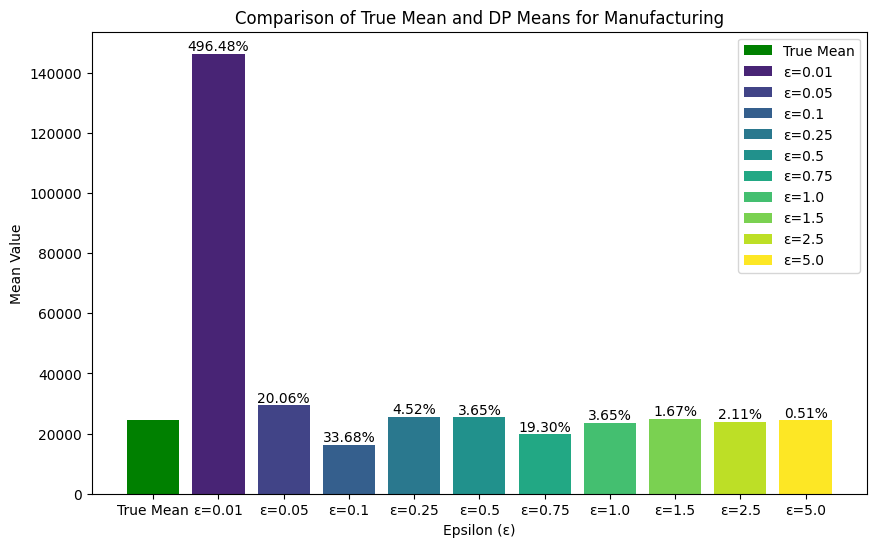

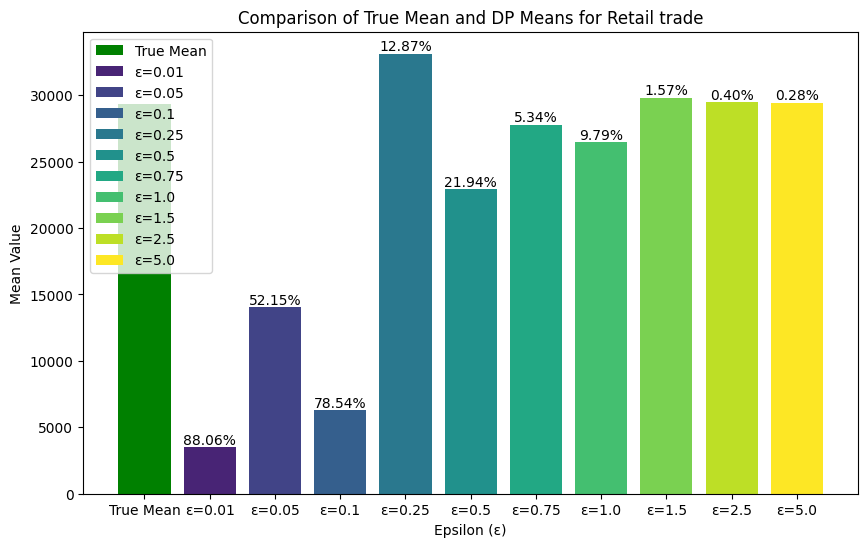

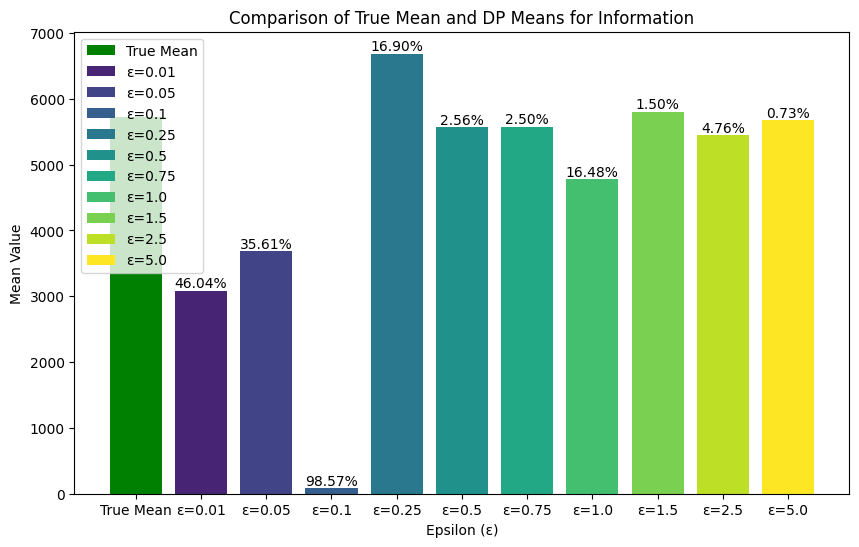

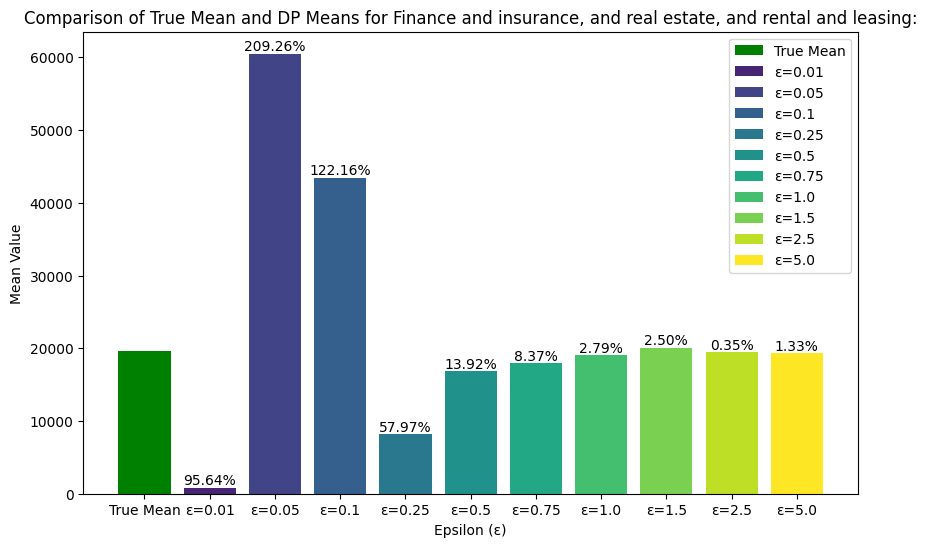

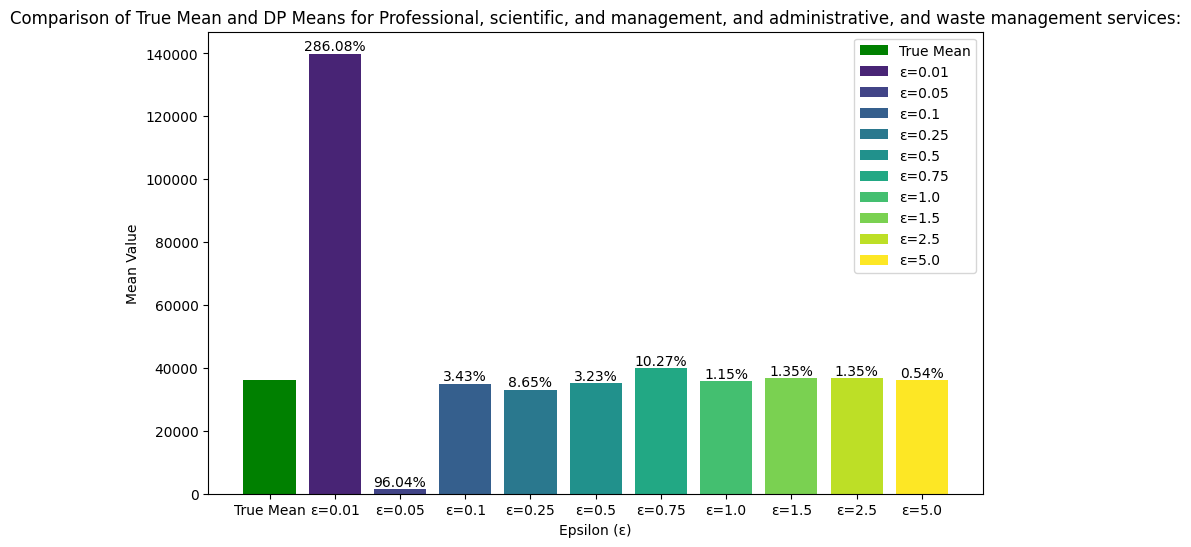

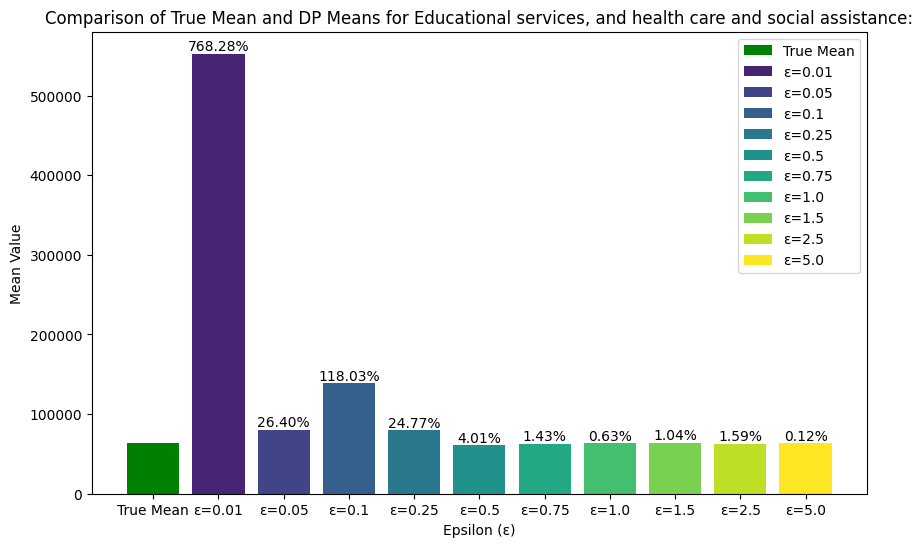

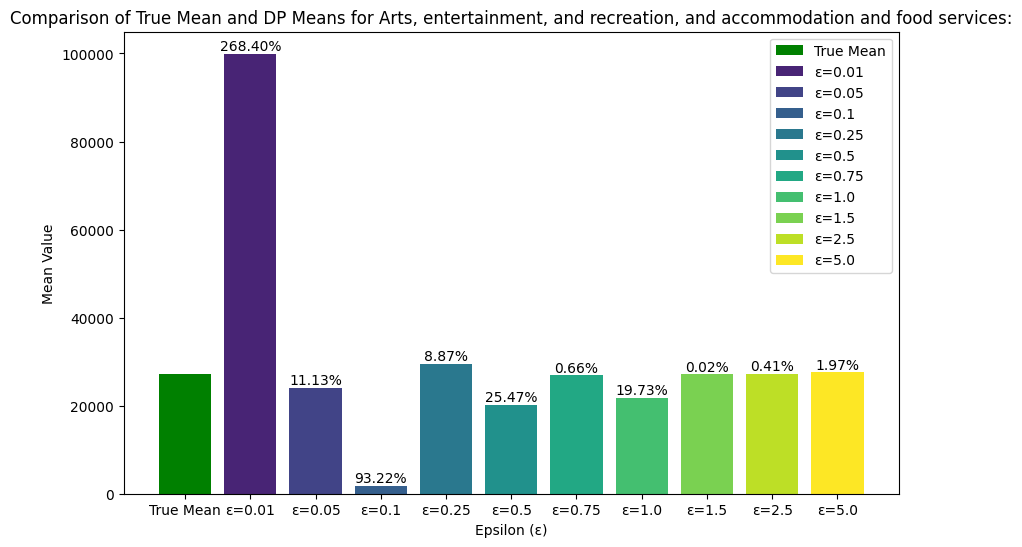

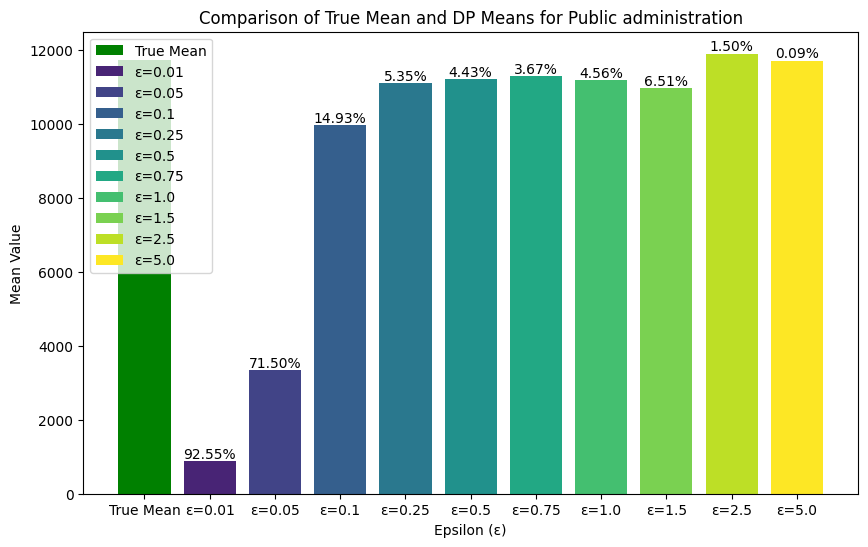

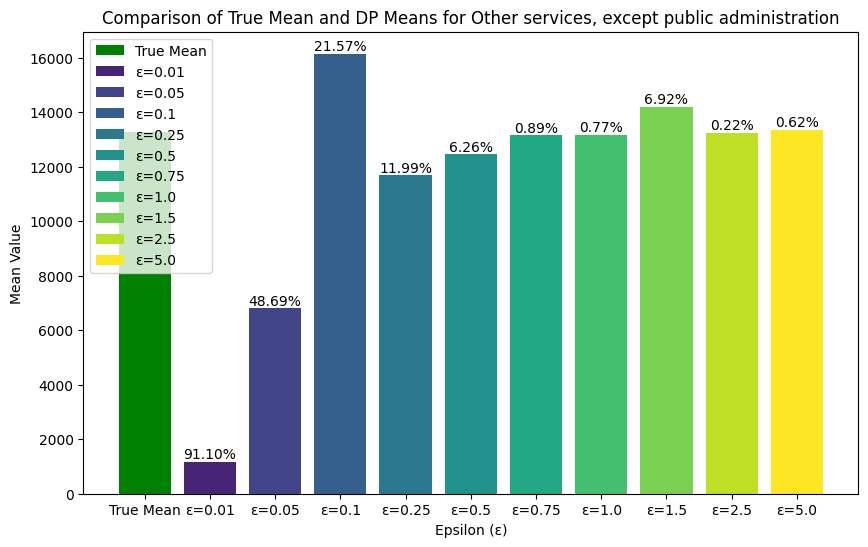

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from diffprivlib.tools import mean

for sector in key_sectors:
    true_mean = data[sector].mean()
    dp_means = []
    errors = []

    for eps in epsilons:
        dp_mean_value = mean(data[sector], epsilon=eps, bounds=(data[sector].min(), data[sector].max()))
        dp_means.append(dp_mean_value)
        error = abs(dp_mean_value - true_mean) / true_mean * 100
        errors.append(error)

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_positions = list(range(len(epsilons) + 1))
    ax.bar(bar_positions[0], true_mean, color='green', label='True Mean')

    for i, (eps, dp_mean) in enumerate(zip(epsilons, dp_means), start=1):
        ax.bar(bar_positions[i], dp_mean, color=plt.cm.viridis(i / len(epsilons)), label=f'ε={eps}')
        ax.text(bar_positions[i], dp_mean, f'{errors[i-1]:.2f}%', ha='center', va='bottom')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(['True Mean'] + [f'ε={eps}' for eps in epsilons])

    ax.set_title(f'Comparison of True Mean and DP Means for {sector}')
    ax.set_xlabel('Epsilon (ε)')
    ax.set_ylabel('Mean Value')
    ax.legend()

    plt.show()


In [ ]:
from diffprivlib.mechanisms import Laplace
import pandas as pd
import numpy as np

def add_laplace_noise(data, epsilon):
    """Apply Laplace noise for differential privacy to a count query."""
    laplace_mech = Laplace(epsilon=epsilon, sensitivity=5)
    noisy_data = data.apply(laplace_mech.randomise)
    # Round the noisy data to the nearest integer
    return np.round(noisy_data).astype(int)

private_df_max_utility = pd.DataFrame()
private_df_max_privacy=pd.DataFrame()
for sector, epsilon in utility_epsilons_mean.items():
    if sector in data.columns:
        private_df_max_utility[sector] = add_laplace_noise(data[sector], epsilon)
for sector, epsilon in private_epsilons_mean.items():
    if sector in data.columns:
        private_df_max_privacy[sector] = add_laplace_noise(data[sector], epsilon)



In [ ]:
data.shape

(425, 165)

In [ ]:
print("Original Data Descriptive Statistics:\n", data[key_sectors].describe())
print("\nDifferentially Private Data Descriptive Statistics:\n", private_df_max_privacy.describe())


Original Data Descriptive Statistics:
         Construction  Manufacturing   Retail trade    Information  \
count     425.000000     425.000000     425.000000     425.000000   
mean    18559.545882   24536.621176   29340.435294    5717.185882   
std     27180.248099   33938.927924   38530.951593   13248.360838   
min      1822.000000    1328.000000    3503.000000      82.000000   
25%      6611.000000    8781.000000   11043.000000    1286.000000   
50%     11035.000000   14995.000000   17542.000000    2422.000000   
75%     21578.000000   28290.000000   34510.000000    5507.000000   
max    313721.000000  433018.000000  484548.000000  226062.000000   

       Finance and insurance, and real estate, and rental and leasing:  \
count                                         425.000000                 
mean                                        19559.628235                 
std                                         28614.451484                 
min                                        

In [ ]:
# data['Manufacturing']
private_df_max_utility.head()

Construction  Manufacturing  Retail trade  Information  \
0          2260           3700          6457          463   
1         12498          32623         31753         5052   
2          9722          20230         19290         2884   
3         16363          19196         19791         1361   
4          5159          11433         10230         1033   

   Finance and insurance, and real estate, and rental and leasing:  \
0                                               1892                 
1                                              23516                 
2                                               8257                 
3                                               9080                 
4                                               7193                 

   Professional, scientific, and management, and administrative, and waste management services:  \
0                                               3219                                              
1                                              35678                                              
2                                              37581                                              
3                                              17310                                              
4                                              11856                                              

   Educational services, and health care and social assistance:  \
0                                              10123              
1                                              78299              
2                                              36518              
3                                              40716              
4                                              23852              

   Arts, entertainment, and recreation, and accommodation and food services:  \
0                                               4965                           
1                                              29354                           
2                                              17430                           
3                                              15800                           
4                                               9683                           

   Public administration  Other services, except public administration  
0                   1962                                          2045  
1                  13682                                         17314  
2                  17591                                          8657  
3                   8625                                         10201  
4                  10303                                          5773

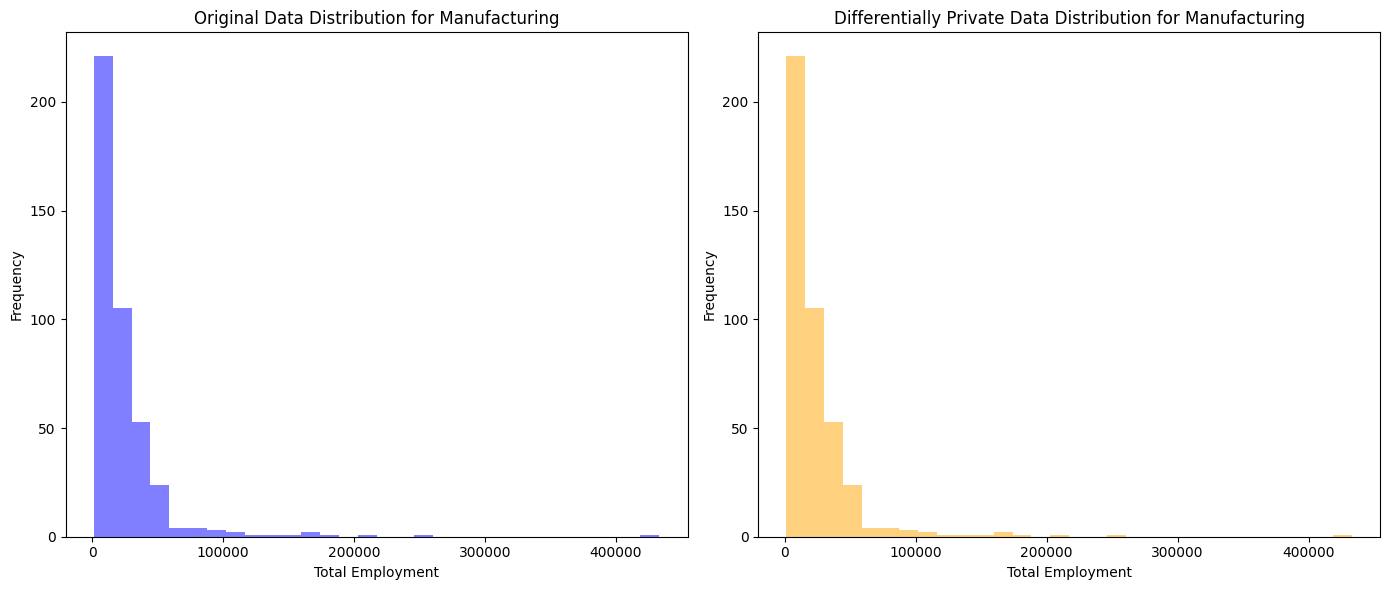

In [ ]:
# Set up the matplotlib figure and axes, with two side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for original data on the left
axes[0].hist(data['Manufacturing'], bins=30, alpha=0.5, color='blue')
axes[0].set_title('Original Data Distribution for Manufacturing')
axes[0].set_xlabel('Total Employment')
axes[0].set_ylabel('Frequency')

# Plot for differentially private data on the right
axes[1].hist(private_df_max_utility['Manufacturing'], bins=30, alpha=0.5, color='orange')
axes[1].set_title('Differentially Private Data Distribution for Manufacturing')
axes[1].set_xlabel('Total Employment')
axes[1].set_ylabel('Frequency')

# Display the plots side by side
plt.tight_layout()
plt.show()


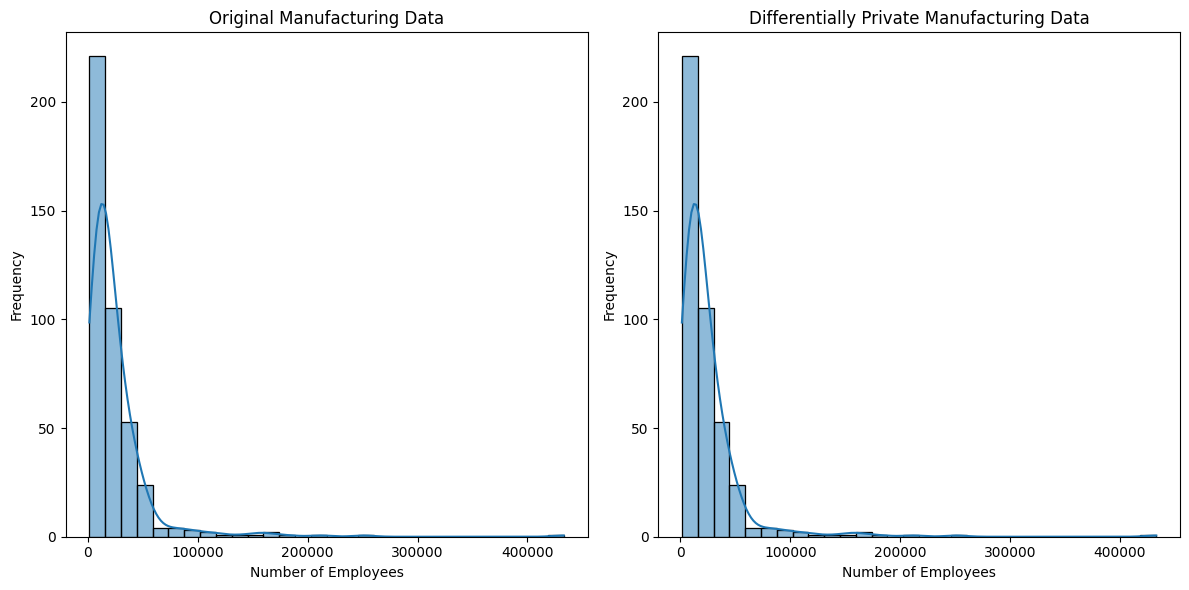

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data plot
sns.histplot(data['Manufacturing'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Manufacturing Data')
axes[0].set_xlabel('Number of Employees')
axes[0].set_ylabel('Frequency')

# Differentially private data plot
sns.histplot(private_df_max_utility['Manufacturing'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Differentially Private Manufacturing Data')
axes[1].set_xlabel('Number of Employees')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


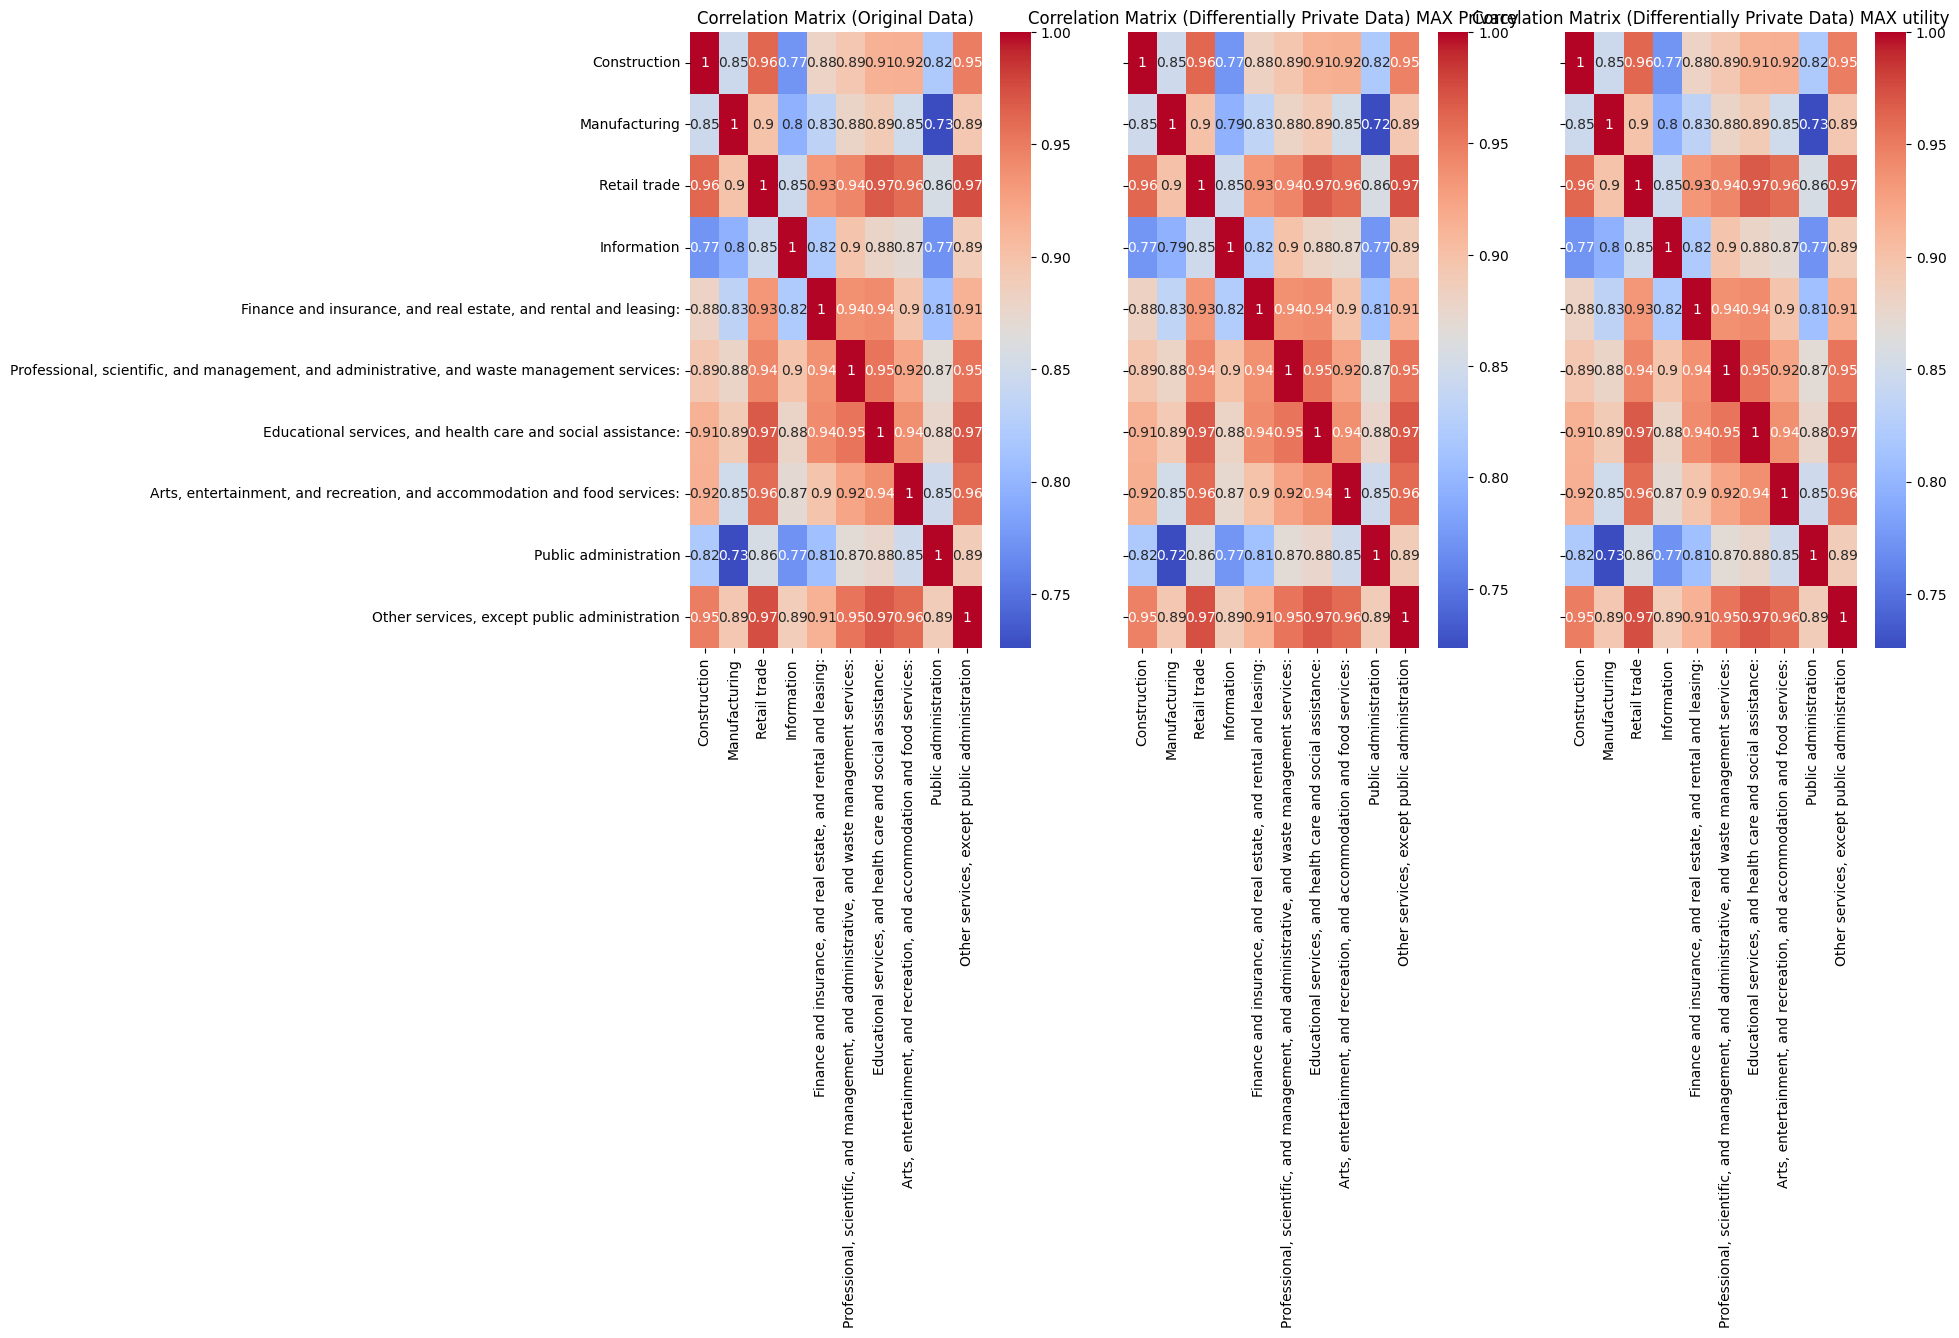

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


correlation_matrix_original = data[key_sectors].corr()


correlation_matrix_utility = private_df_max_utility[key_sectors].corr()

correlation_matrix_private = private_df_max_privacy[key_sectors].corr()

# Set up the matplotlib figure for side-by-side heatmaps
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), sharey=True)

# Heatmap for the original data correlation matrix
sns.heatmap(correlation_matrix_original, ax=ax[0], annot=True, cmap='coolwarm')
ax[0].set_title('Correlation Matrix (Original Data)')

# Heatmap for the differentially private data correlation matrix
sns.heatmap(correlation_matrix_private, ax=ax[1], annot=True, cmap='coolwarm')
ax[1].set_title('Correlation Matrix (Differentially Private Data) MAX Privacy')

sns.heatmap(correlation_matrix_utility, ax=ax[2], annot=True, cmap='coolwarm')
ax[2].set_title('Correlation Matrix (Differentially Private Data) MAX utility')
plt.show()


In [ ]:
private_df_max_privacy.describe()

Construction  Manufacturing   Retail trade    Information  \
count     425.000000      425.00000     425.000000     425.000000   
mean    18564.543529    24532.36000   29297.129412    5664.851765   
std     27177.577043    33975.14503   38544.246077   13265.557749   
min      1819.000000     1003.00000    3238.000000   -1629.000000   
25%      6520.000000     8843.00000   11242.000000    1244.000000   
50%     11221.000000    15378.00000   17591.000000    2515.000000   
75%     21740.000000    28484.00000   34513.000000    5455.000000   
max    313138.000000   433032.00000  485029.000000  225641.000000   

       Finance and insurance, and real estate, and rental and leasing:  \
count                                         425.000000                 
mean                                        19553.995294                 
std                                         28613.971207                 
min                                           829.000000                 
25%                                          5428.000000                 
50%                                         10223.000000                 
75%                                         21939.000000                 
max                                        298514.000000                 

       Professional, scientific, and management, and administrative, and waste management services:  \
count                                         425.000000                                              
mean                                        36228.425882                                              
std                                         57071.565568                                              
min                                           288.000000                                              
25%                                          9214.000000                                              
50%                                         17486.000000                                              
75%                                         39951.000000                                              
max                                        689816.000000                                              

       Educational services, and health care and social assistance:  \
count                                       4.250000e+02              
mean                                        6.359420e+04              
std                                         8.243046e+04              
min                                         6.396000e+03              
25%                                         2.347100e+04              
50%                                         3.922000e+04              
75%                                         7.562600e+04              
max                                         1.049641e+06              

       Arts, entertainment, and recreation, and accommodation and food services:  \
count                                         425.000000                           
mean                                        27130.807059                           
std                                         42081.009180                           
min                                          1807.000000                           
25%                                          9325.000000                           
50%                                         15308.000000                           
75%                                         29344.000000                           
max                                        572682.000000                           

       Public administration  Other services, except public administration  
count             425.000000                                    425.000000  
mean            11735.858824                                  13257.872941  
std             14746.296337                                  20160.187921  
min               116.000000                                    399.000000  
25%      

In [ ]:
private_df_max_utility.describe()

Construction  Manufacturing   Retail trade    Information  \
count     425.000000     425.000000     425.000000     425.000000   
mean    18559.550588   24536.529412   29340.698824    5717.042353   
std     27180.072816   33938.796196   38530.880306   13248.134332   
min      1828.000000    1323.000000    3504.000000      81.000000   
25%      6613.000000    8779.000000   11047.000000    1288.000000   
50%     11034.000000   14990.000000   17542.000000    2423.000000   
75%     21582.000000   28288.000000   34510.000000    5507.000000   
max    313723.000000  433013.000000  484549.000000  226056.000000   

       Finance and insurance, and real estate, and rental and leasing:  \
count                                         425.000000                 
mean                                        19560.152941                 
std                                         28614.618984                 
min                                           851.000000                 
25%                                          5382.000000                 
50%                                         10260.000000                 
75%                                         21818.000000                 
max                                        298697.000000                 

       Professional, scientific, and management, and administrative, and waste management services:  \
count                                         425.000000                                              
mean                                        36241.927059                                              
std                                         57068.974385                                              
min                                          1436.000000                                              
25%                                          9276.000000                                              
50%                                         17262.000000                                              
75%                                         40111.000000                                              
max                                        689828.000000                                              

       Educational services, and health care and social assistance:  \
count                                       4.250000e+02              
mean                                        6.363080e+04              
std                                         8.245725e+04              
min                                         6.407000e+03              
25%                                         2.356300e+04              
50%                                         3.974400e+04              
75%                                         7.582300e+04              
max                                         1.050067e+06              

       Arts, entertainment, and recreation, and accommodation and food services:  \
count                                         425.000000                           
mean                                        27128.129412                           
std                                         42080.014142                           
min                                          1845.000000                           
25%                                          9338.000000                           
50%                                         15365.000000                           
75%                                         29371.000000                           
max                                        572707.000000                           

       Public administration  Other services, except public administration  
count             425.000000                                    425.000000  
mean            11721.103529                                  13278.821176  
std             14749.184231                                  20177.687989  
min               878.000000                                   1182.000000  
25%      

In [ ]:
data[key_sectors].describe()

Construction  Manufacturing   Retail trade    Information  \
count     425.000000     425.000000     425.000000     425.000000   
mean    18559.545882   24536.621176   29340.435294    5717.185882   
std     27180.248099   33938.927924   38530.951593   13248.360838   
min      1822.000000    1328.000000    3503.000000      82.000000   
25%      6611.000000    8781.000000   11043.000000    1286.000000   
50%     11035.000000   14995.000000   17542.000000    2422.000000   
75%     21578.000000   28290.000000   34510.000000    5507.000000   
max    313721.000000  433018.000000  484548.000000  226062.000000   

       Finance and insurance, and real estate, and rental and leasing:  \
count                                         425.000000                 
mean                                        19559.628235                 
std                                         28614.451484                 
min                                           852.000000                 
25%                                          5384.000000                 
50%                                         10263.000000                 
75%                                         21814.000000                 
max                                        298700.000000                 

       Professional, scientific, and management, and administrative, and waste management services:  \
count                                         425.000000                                              
mean                                        36241.920000                                              
std                                         57068.917089                                              
min                                          1435.000000                                              
25%                                          9276.000000                                              
50%                                         17262.000000                                              
75%                                         40110.000000                                              
max                                        689827.000000                                              

       Educational services, and health care and social assistance:  \
count                                       4.250000e+02              
mean                                        6.363082e+04              
std                                         8.245732e+04              
min                                         6.407000e+03              
25%                                         2.356300e+04              
50%                                         3.974500e+04              
75%                                         7.582000e+04              
max                                         1.050067e+06              

       Arts, entertainment, and recreation, and accommodation and food services:  \
count                                         425.000000                           
mean                                        27127.952941                           
std                                         42080.053389                           
min                                          1840.000000                           
25%                                          9340.000000                           
50%                                         15357.000000                           
75%                                         29372.000000                           
max                                        572709.000000                           

       Public administration  Other services, except public administration  
count             425.000000                                    425.000000  
mean            11720.682353                                  13278.741176  
std             14748.759748                                  20177.628265  
min               873.000000                                   1182.000000  
25%      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

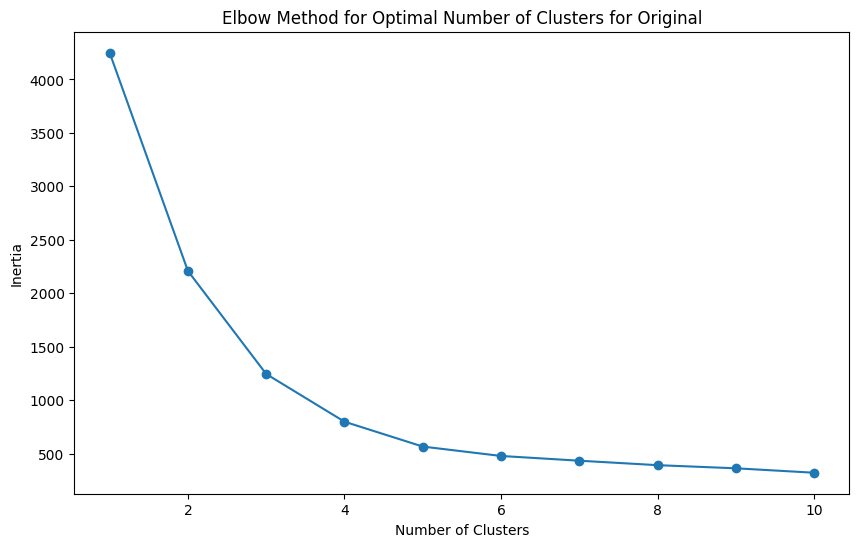

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


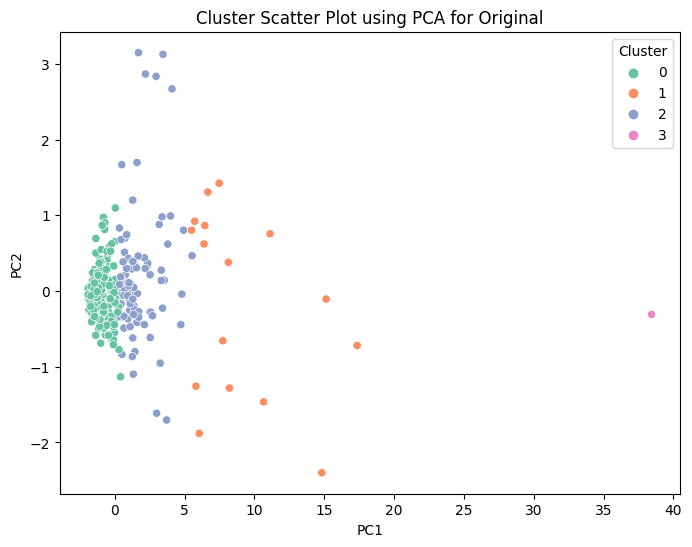

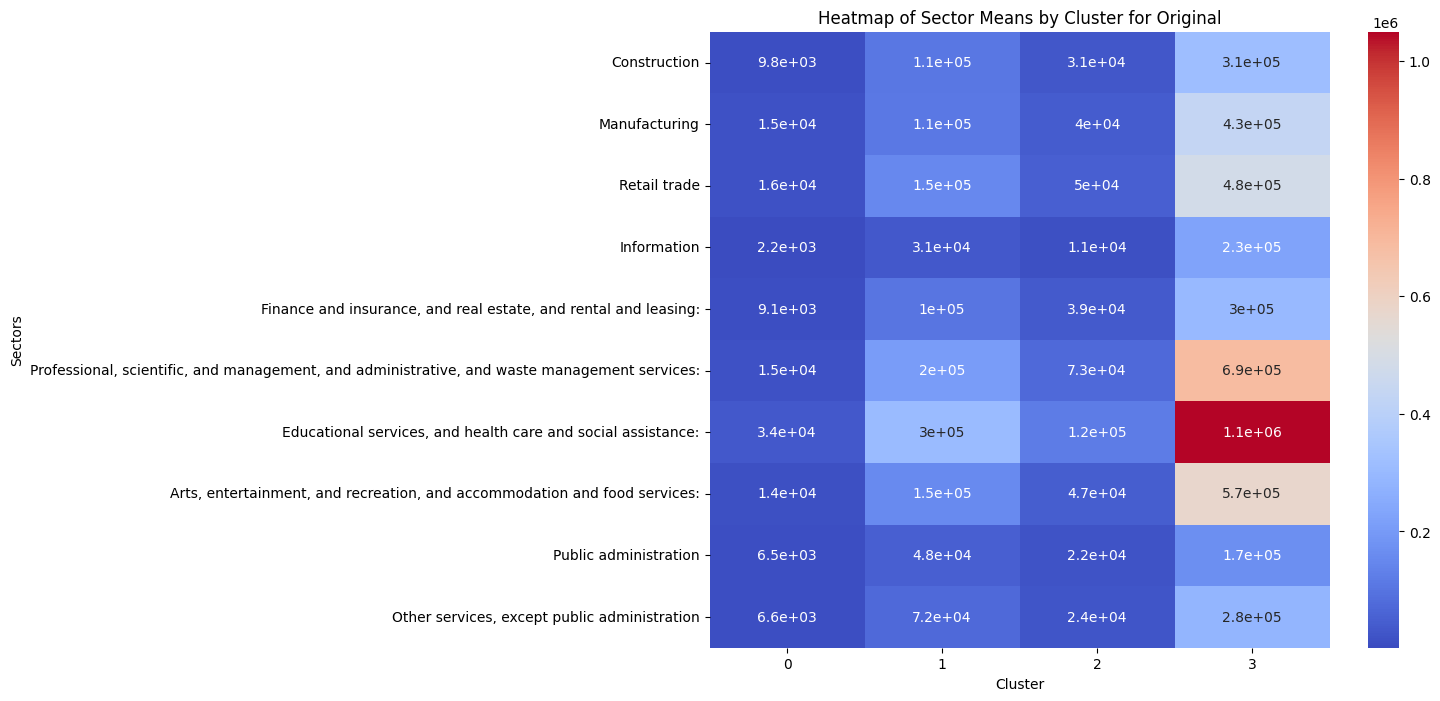

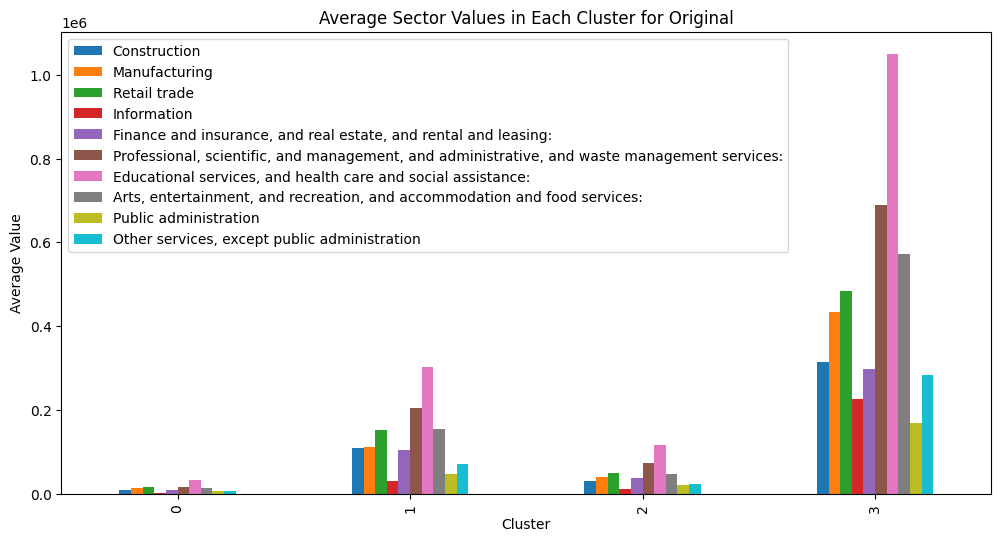

In [ ]:
csOriginal=KmeansClustering(data[key_sectors],2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

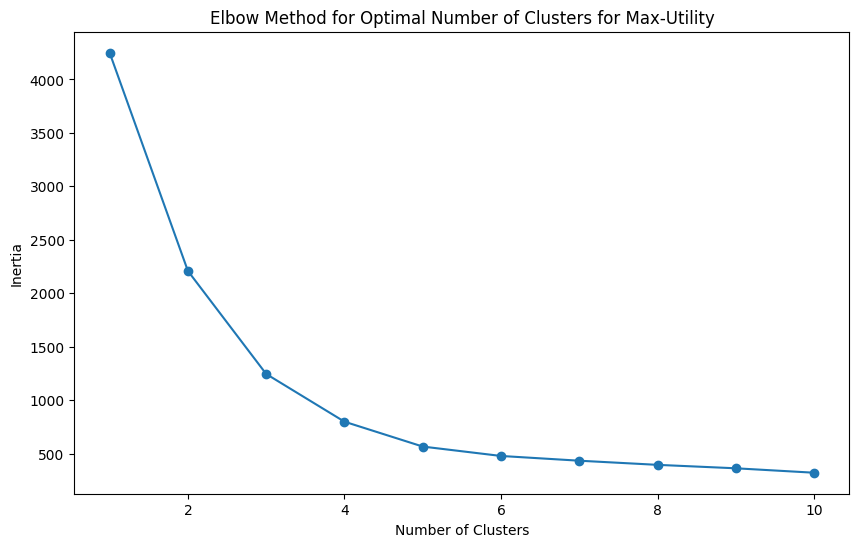

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


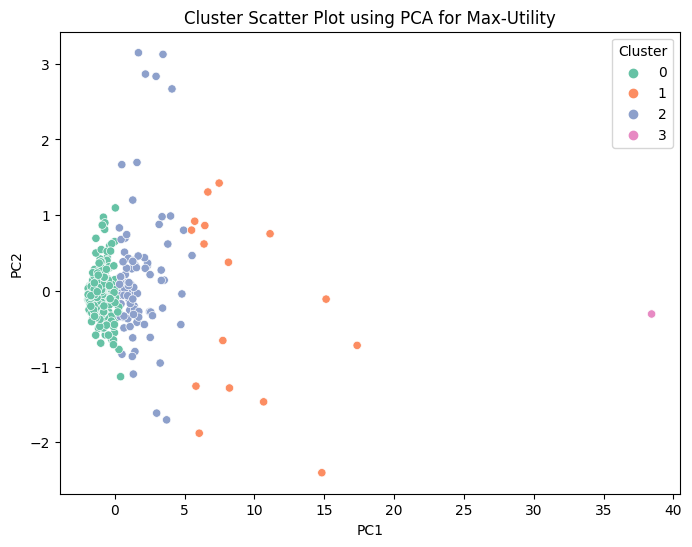

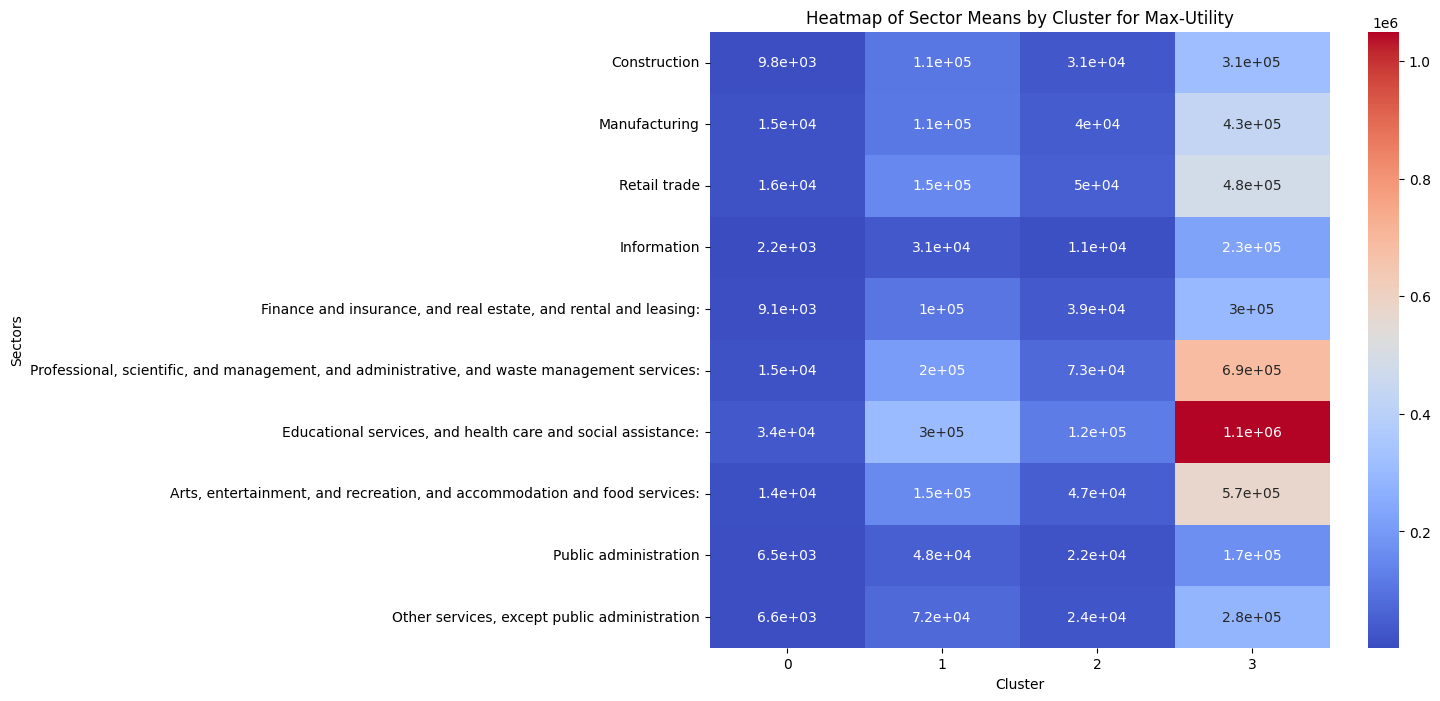

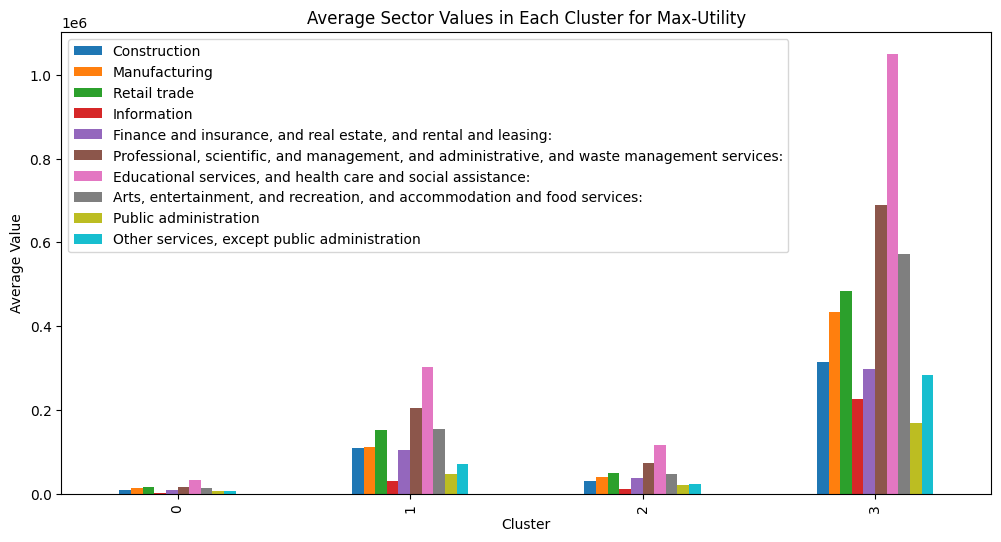

In [ ]:
csUtility=KmeansClustering(private_df_max_utility,1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

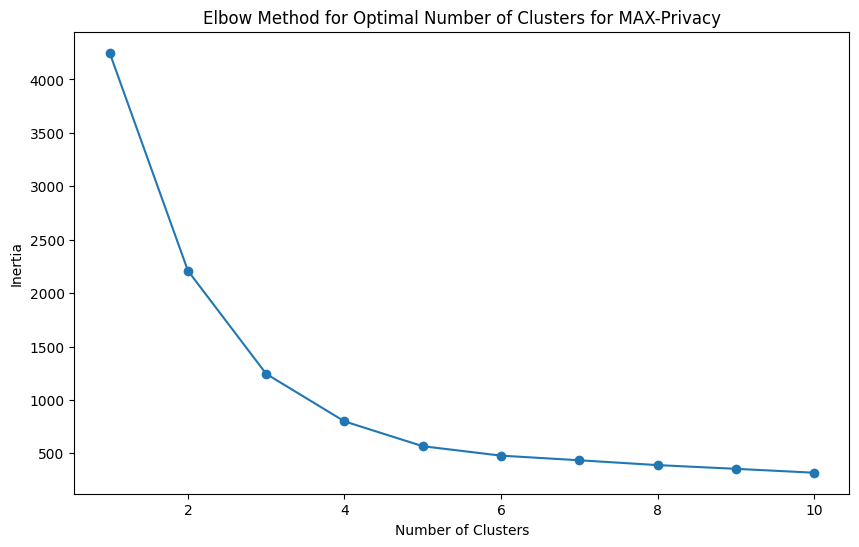

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


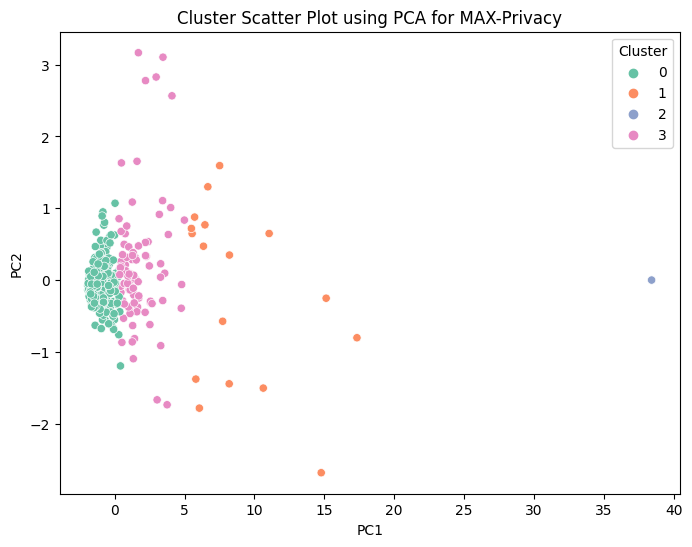

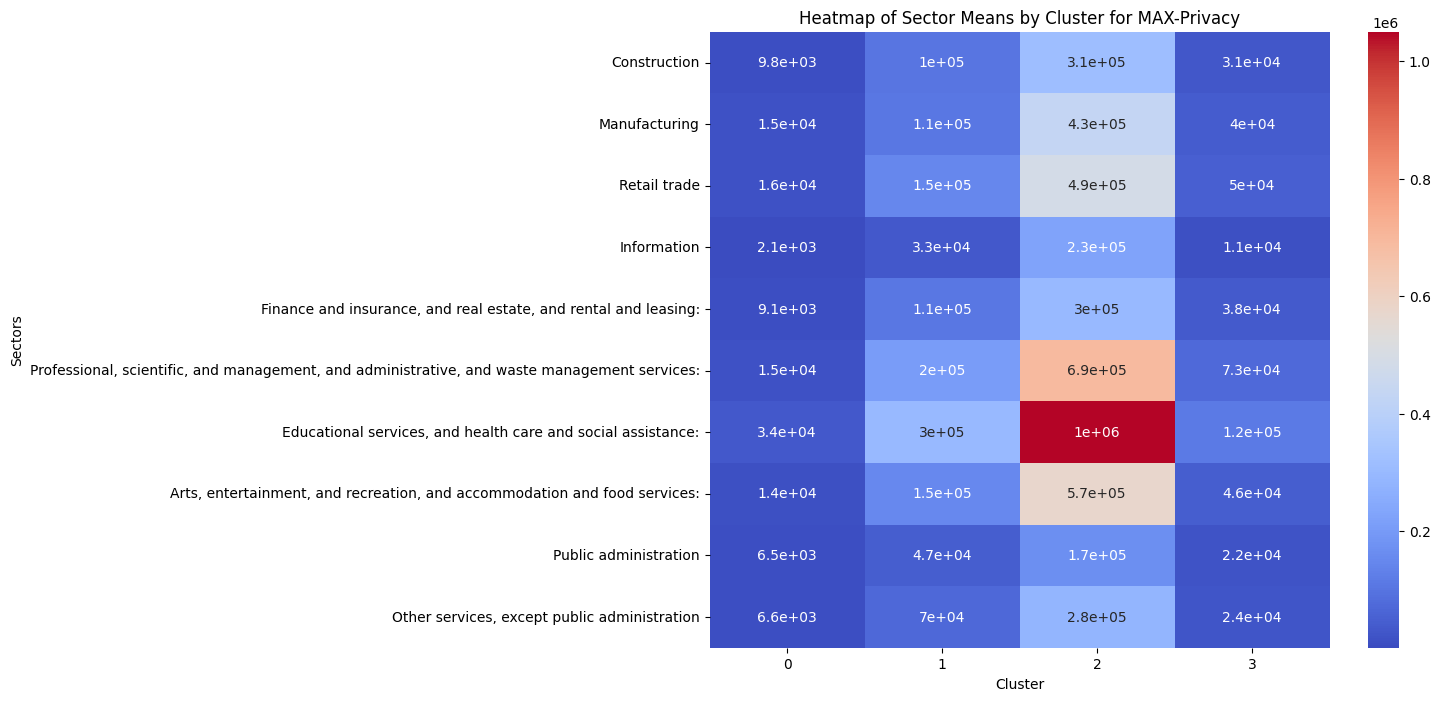

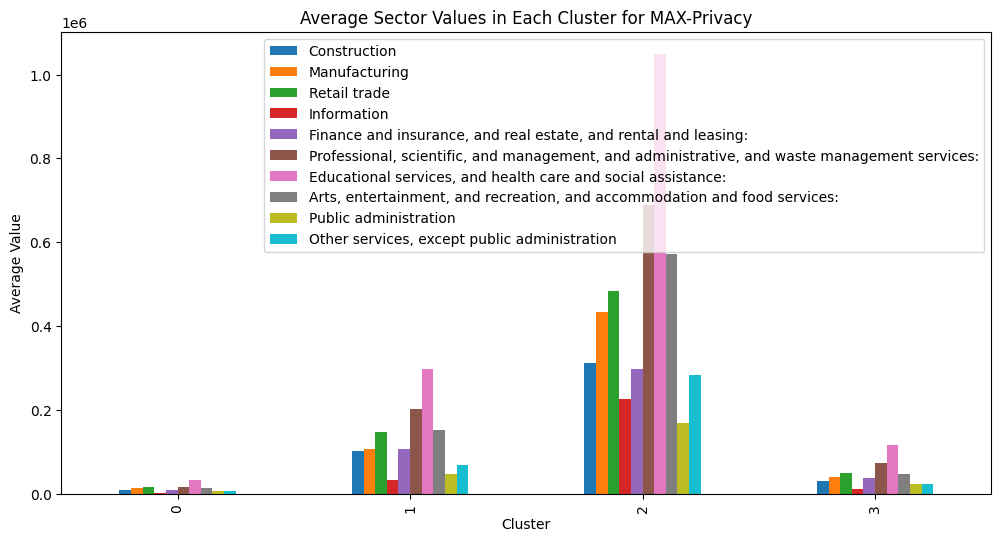

In [ ]:
csPrivacy=KmeansClustering(private_df_max_privacy,0)

          Construction  Manufacturing   Retail trade    Information  \
Cluster                                                               
0          9789.526646   14662.833856   15918.385580    2191.974922   
1        108459.312500  112458.312500  151927.125000   31186.812500   
2         30515.483146   39531.112360   50295.932584   11297.898876   
3        313721.000000  433018.000000  484548.000000  226062.000000   

         Finance and insurance, and real estate, and rental and leasing:  \
Cluster                                                                    
0                                              9059.990596                 
1                                            103776.687500                 
2                                             38916.606742                 
3                                            298700.000000                 

         Professional, scientific, and management, and administrative, and waste management services:  \
Cluster    

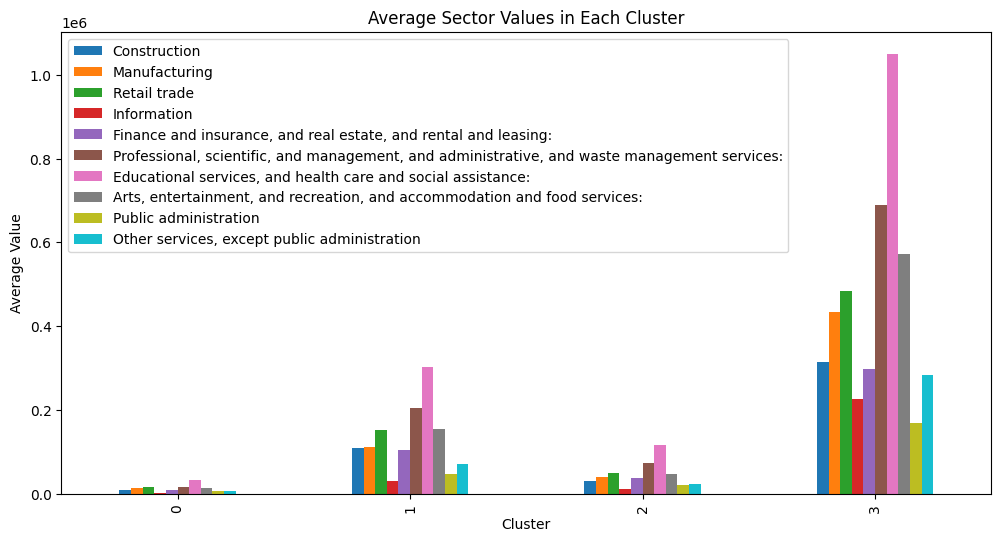

In [ ]:
print(csOriginal)

csOriginal.plot(kind='bar', figsize=(12, 6))
plt.title(f'Average Sector Values in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()

In [ ]:
x=data['Construction'].describe()
y=private_df_max_privacy['Construction'].describe()
z=private_df_max_utility['Construction'].describe()
print(x,y,z)

count       425.000000
mean      18559.545882
std       27180.248099
min        1822.000000
25%        6611.000000
50%       11035.000000
75%       21578.000000
max      313721.000000
Name: Construction, dtype: float64 count       425.000000
mean      18564.543529
std       27177.577043
min        1819.000000
25%        6520.000000
50%       11221.000000
75%       21740.000000
max      313138.000000
Name: Construction, dtype: float64 count       425.000000
mean      18559.550588
std       27180.072816
min        1828.000000
25%        6613.000000
50%       11034.000000
75%       21582.000000
max      313723.000000
Name: Construction, dtype: float64
